#  VEHICLE LOAN DEFAULT PREDICTION AND ML MODELS ACCURACY                                               COMPARISON

IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
from datetime import datetime
import re

from sklearn import metrics

In [2]:
data_dictionary=pd.read_csv(r'C:\Users\Rahul singh\Downloads\data_dictionary.csv')
data_dictionary

,Unnamed: 0,Variable Name,Description,Unnamed: 2
0,0,UniqueID,Identifier for customers,NaN
1,1,loan_default,Payment default in the first EMI on due date,NaN
2,2,disbursed_amount,Amount of Loan disbursed,NaN
3,3,asset_cost,Cost of the Asset,NaN
4,4,ltv,Loan to Value of the asset,NaN
5,5,branch_id,Branch where the loan was disbursed,NaN
6,6,supplier_id,Vehicle Dealer where the loan was disbursed,NaN
7,7,manufacturer_id,"Vehicle manufacturer(Hero, Honda, TVS etc.)",NaN
8,8,Current_pincode,Current pincode of the customer,NaN
9,9,Date.of.Birth,Date of birth of the customer,NaN


In [3]:
df=pd.read_csv(r'C:\Users\Rahul singh\Downloads\train.csv')
df.head() #display names of top 5 entries

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
df.nunique() #returns number of unique elements in a list

UniqueID                               233154
disbursed_amount                        24565
asset_cost                              46252
ltv                                      6579
branch_id                                  82
supplier_id                              2953
manufacturer_id                            11
Current_pincode_ID                       6698
Date.of.Birth                           15433
Employment.Type                             2
DisbursalDate                              84
State_ID                                   22
Employee_code_ID                         3270
MobileNo_Avl_Flag                           1
Aadhar_flag                                 2
PAN_flag                                    2
VoterID_flag                                2
Driving_flag                                2
Passport_flag                               2
PERFORM_CNS.SCORE                         573
PERFORM_CNS.SCORE.DESCRIPTION              20
PRI.NO.OF.ACCTS                   

In [5]:
df.describe() #description of the column

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


In [6]:
import missingno

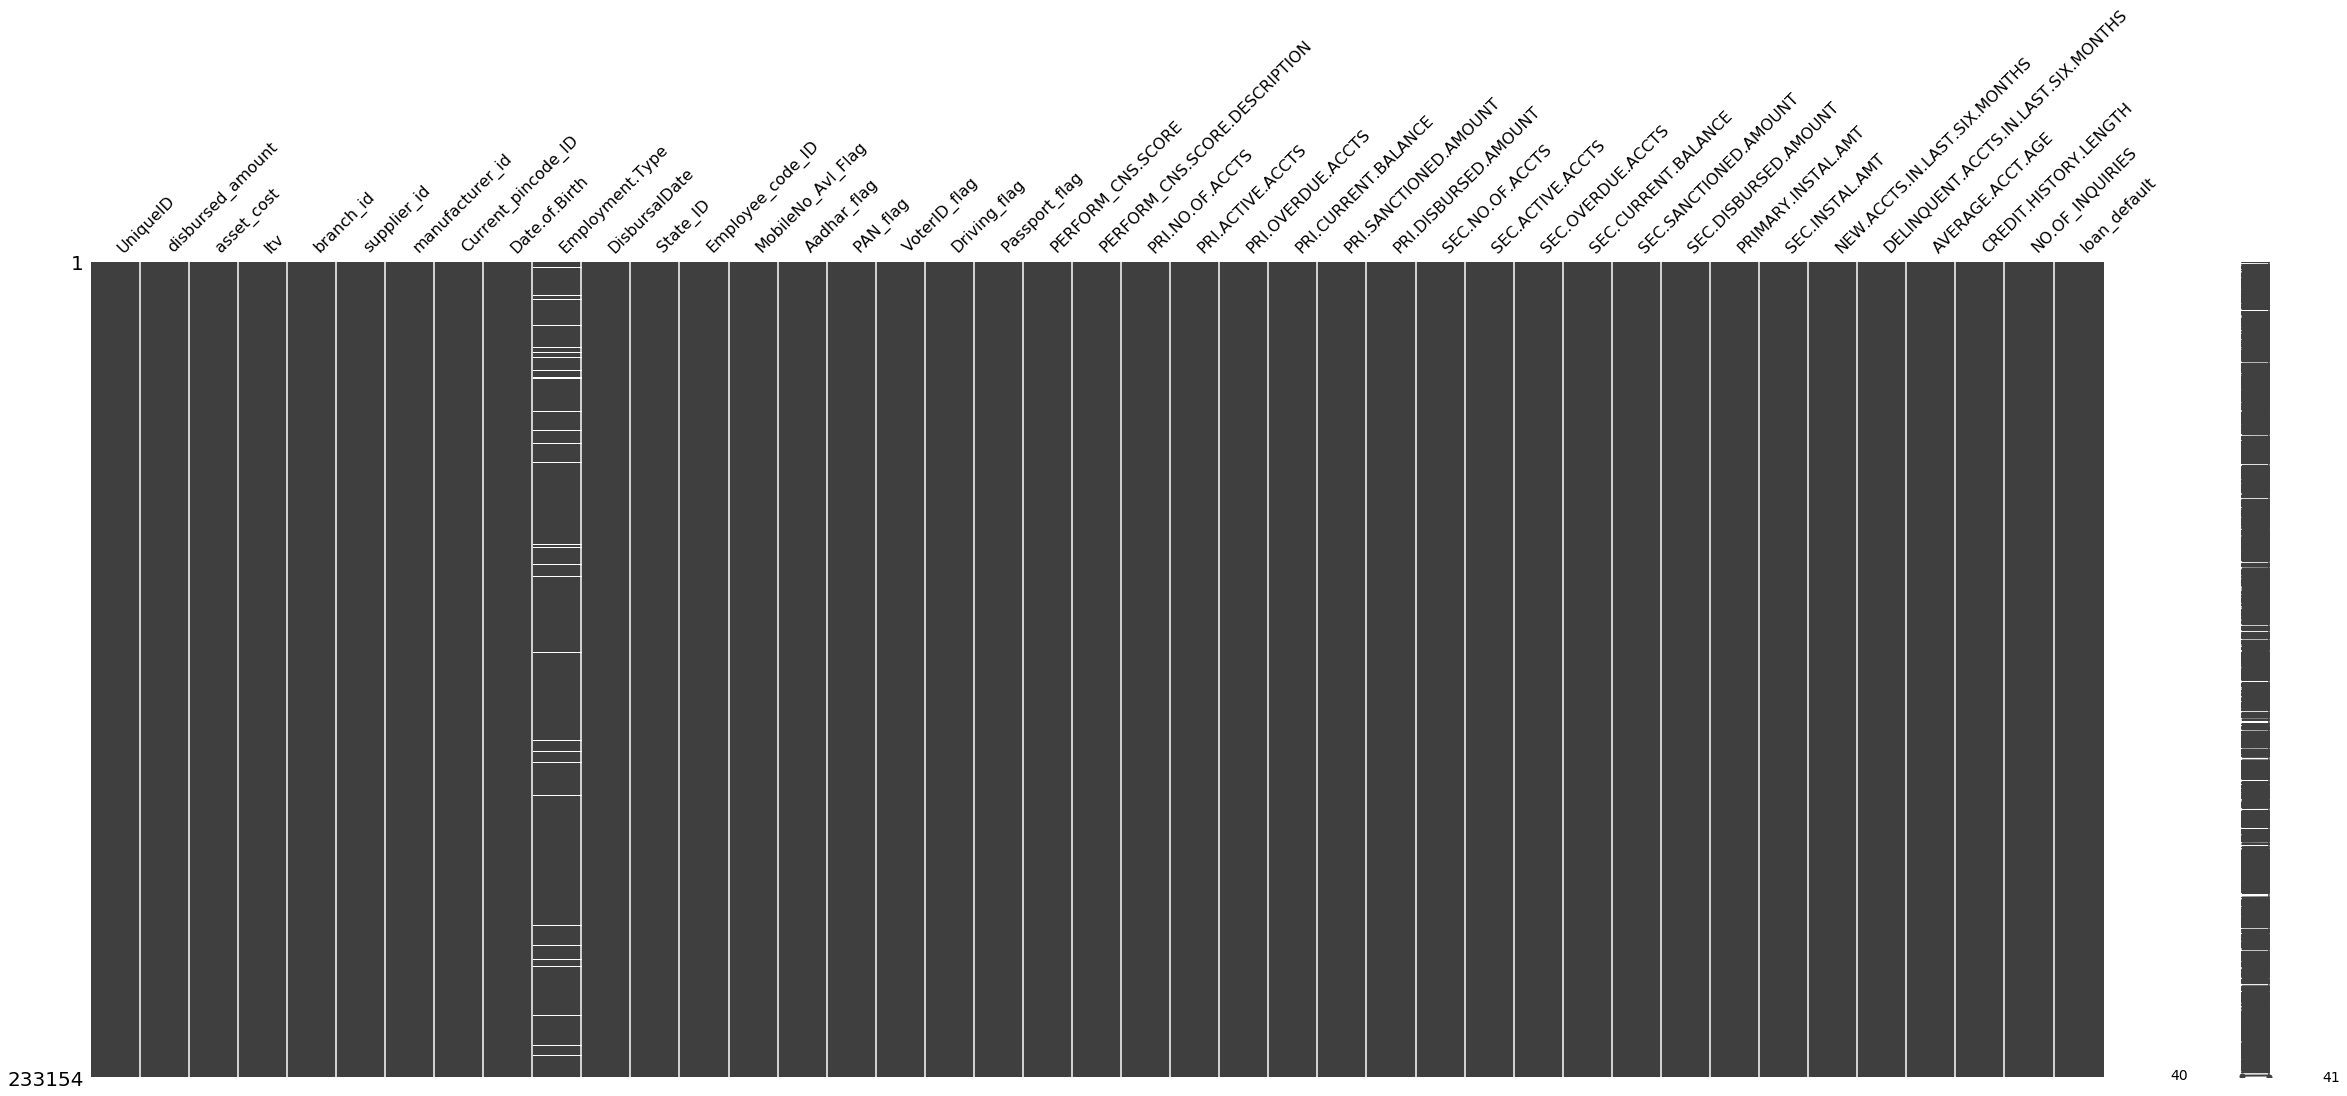

In [7]:
missingno.matrix(df,figsize=(40,15))

As we can see from this visualisation that there are some missing values in Employment.Type column

In [8]:
df.shape

(233154, 41)

Now to know the correlation between the features of the customers,we draw a heatmap for easy understanding


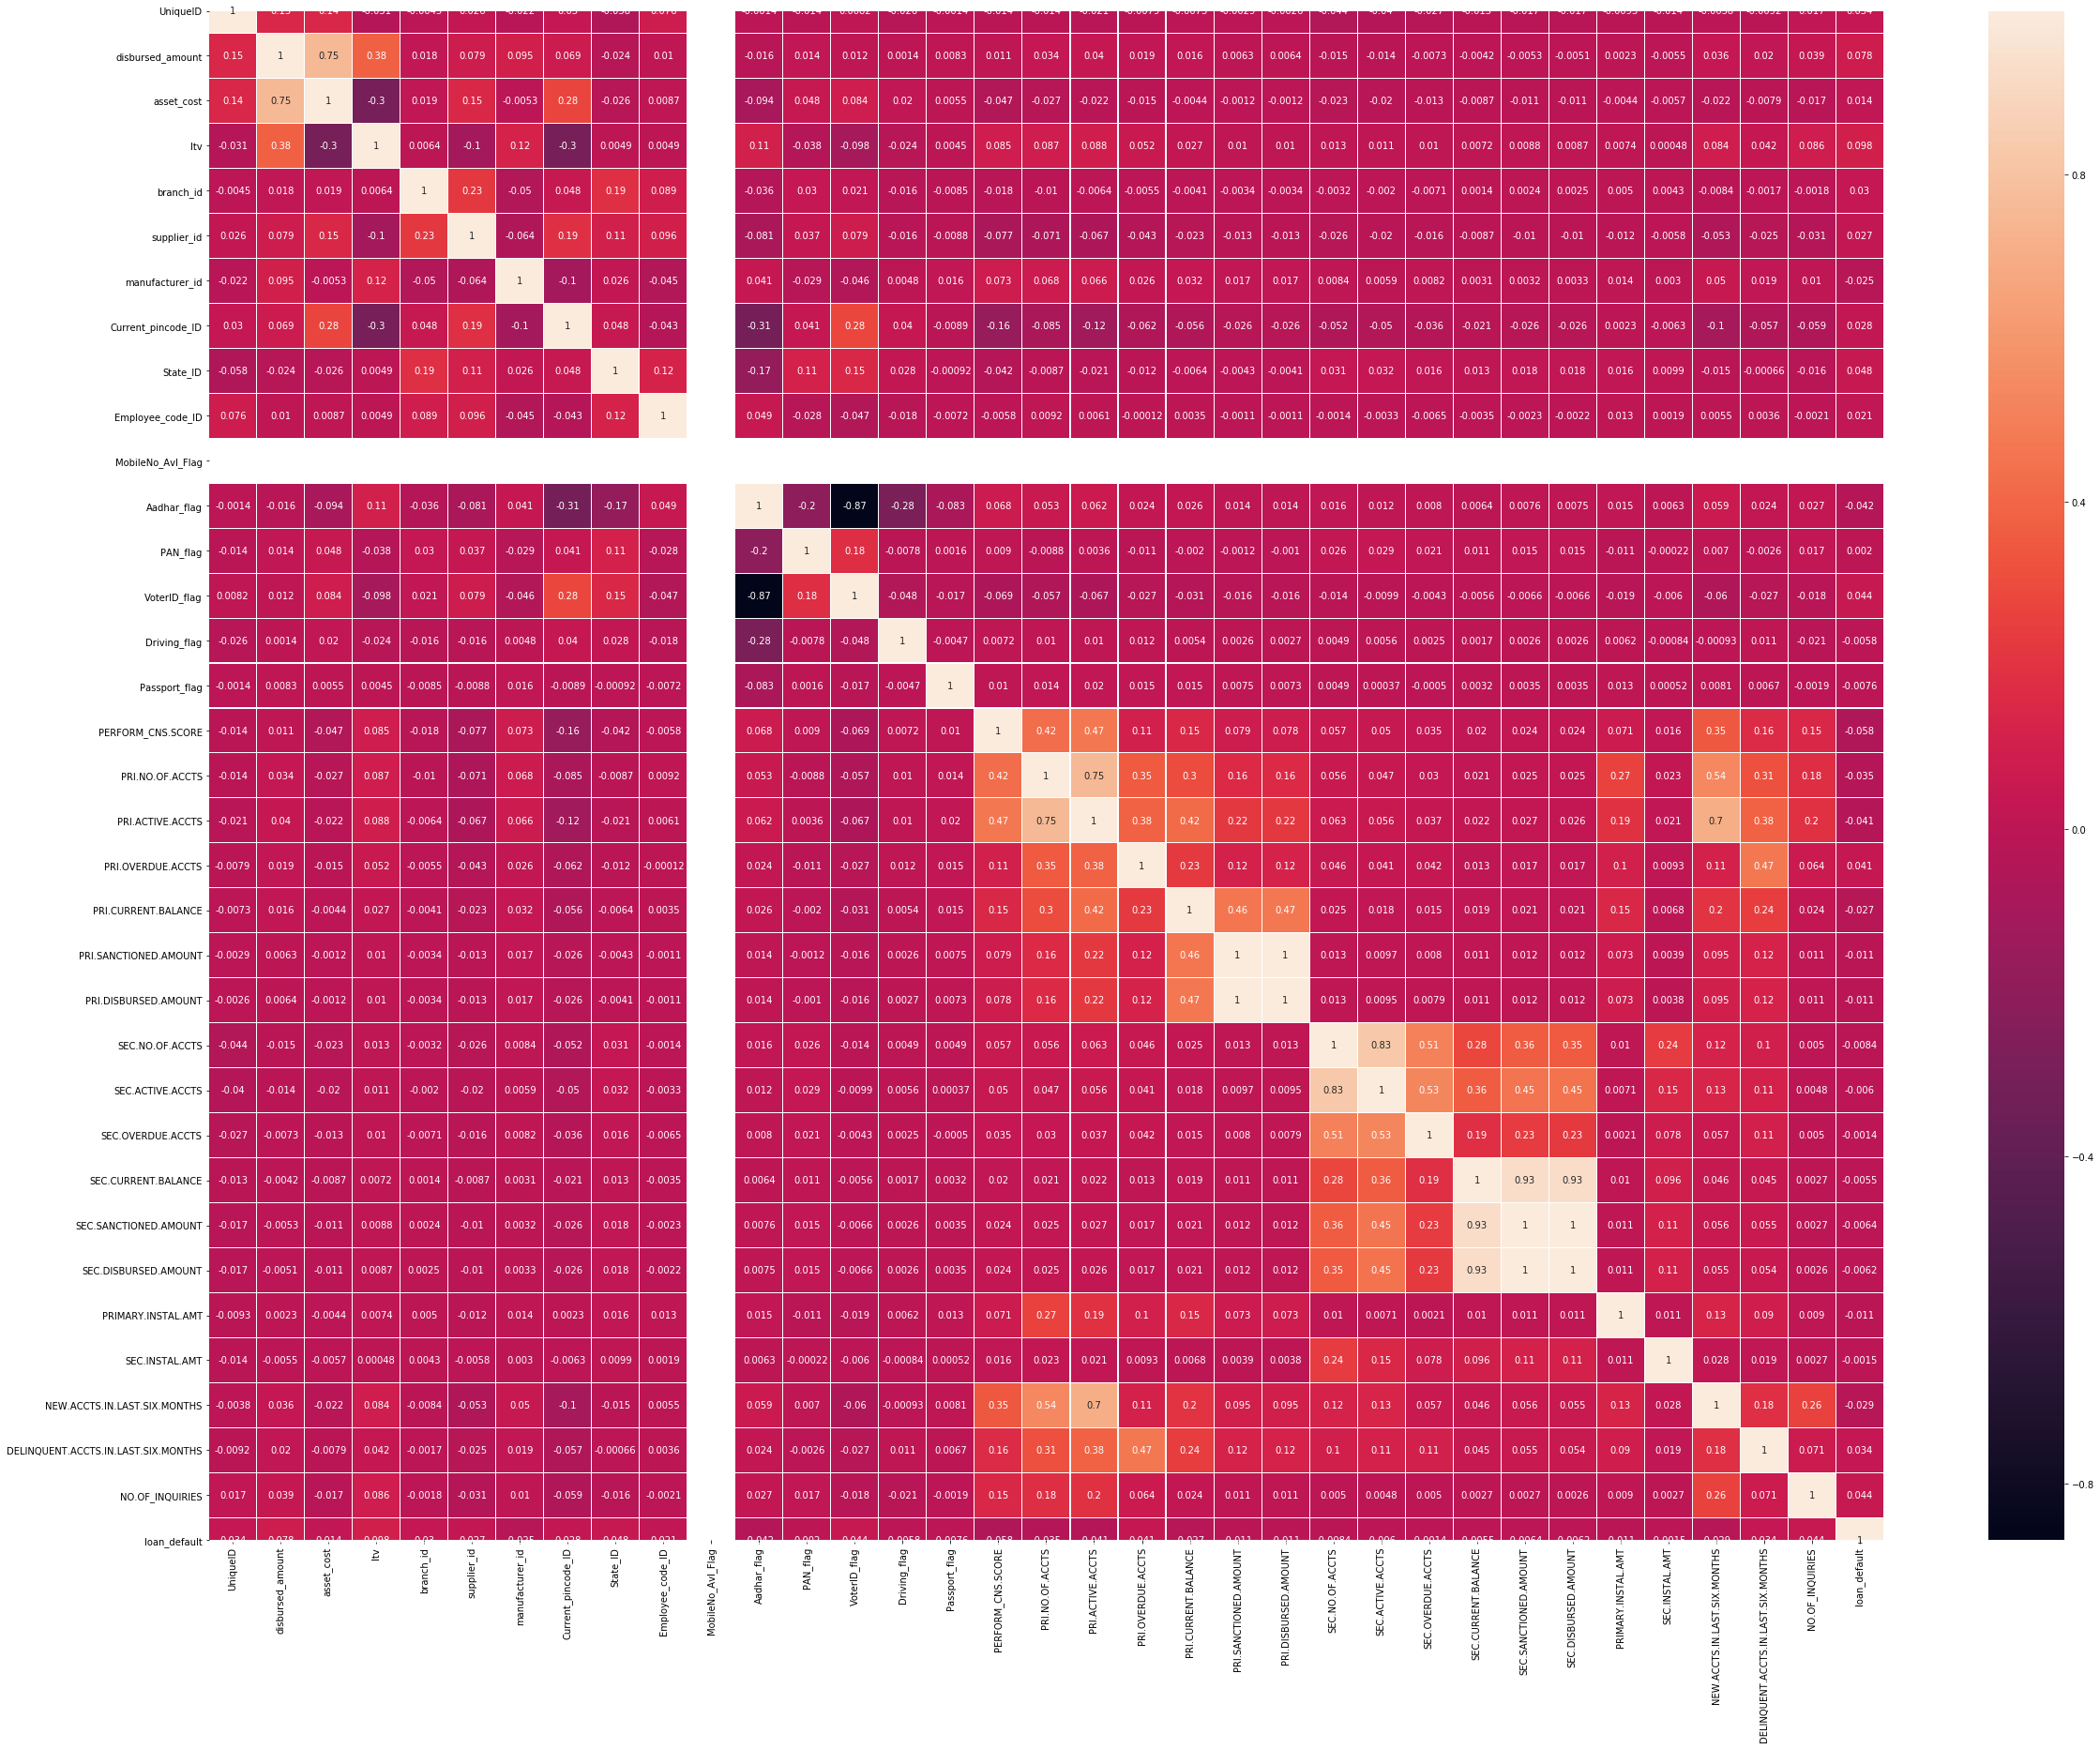

In [9]:
plt.figure(figsize=(40,30))
sns.heatmap(df.corr(),linewidths=0.05,annot=True) #showing heatmap plots
plt.show()

As we can see here that 'MobileNo_Avl_Flag' column doesnt have any entry in it so we can drop this column. Also the column 'UniqueID' doesnt depict any feature,so it can dropped too.


In [10]:
df.drop(['MobileNo_Avl_Flag','UniqueID'],axis=1,inplace=True)

Now lets separate the entries based on which have defaulted loan_payment and those which do not 

In [11]:
df1=df[df['loan_default']==1]  #separates dataframe with loan default set as 1,which means true.
df0=df[df['loan_default']==0] #separates dataframe with loan  dafault set as 0. 
df0.head()                  #df with loan_default=0

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
2,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
5,54513,61900,89.66,67,22807,45,1501,08-09-90,Self employed,19-09-18,...,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0
6,46349,61500,76.42,67,22807,45,1502,01-06-88,Salaried,23-09-18,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
7,43894,61900,71.89,67,22807,45,1501,04-10-89,Salaried,16-09-18,...,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,0


Now for analysis we will go through all the different variables and see how the pattern differs for defaulted and other customers .


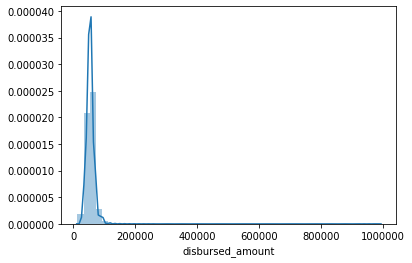

In [12]:
sns.distplot(df['disbursed_amount'])

Now in order to see the plot more clearly.

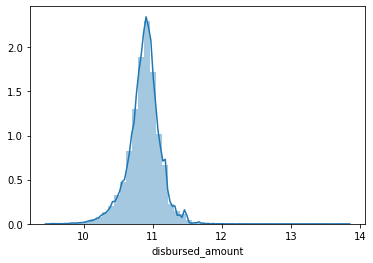

In [13]:
sns.distplot(df['disbursed_amount'].apply(lambda x:np.log(x)))   #logfunction here to better fit  the graph

So this gives a clearer picture and also will provide better functioning of the models since the 'disbursed_amount' is reduced.

In [14]:
df['disbursed_amount']=df['disbursed_amount'].apply(lambda x:np.log(x))

In [15]:
df

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,10.831272,58400,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,10.760983,65550,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,10.883279,61360,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,10.959766,66113,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,10.866242,60300,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,11.054265,105405,60.72,34,20700,48,1050,01-08-88,Salaried,26-10-18,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,11.207093,100600,74.95,34,23775,51,990,05-12-88,Self employed,23-10-18,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,10.418823,71212,48.45,77,22186,86,2299,01-06-76,Salaried,24-10-18,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,10.441705,73286,49.10,77,22186,86,2299,26-03-94,Salaried,29-09-18,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


Also lets look at the difference in 'disbursed_amount' pattern of the defaulted and un-defaulted customers

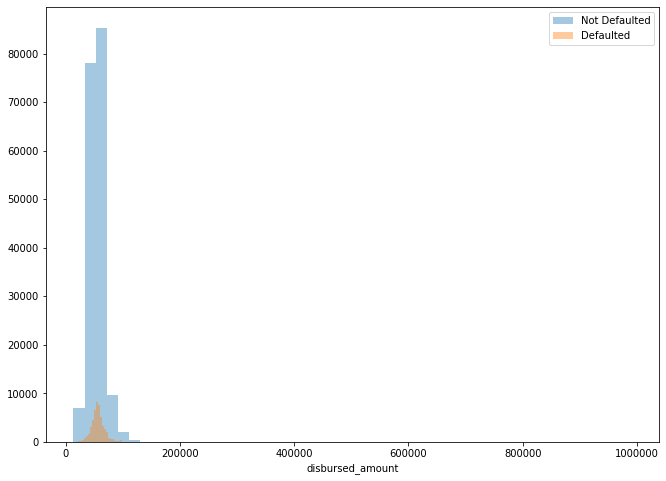

In [16]:
plt.figure(figsize=(11,8))
sns.distplot(df0['disbursed_amount'],kde=False)
sns.distplot(df1['disbursed_amount'],kde=False)
plt.legend(labels=['Not Defaulted','Defaulted'])
plt.show()

# Asset_Cost"

Now to check assmet_cost

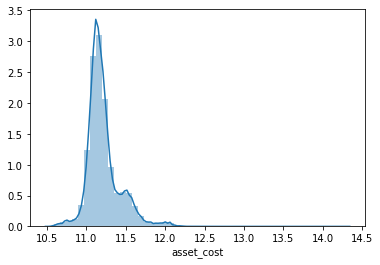

In [17]:
sns.distplot(df['asset_cost'].apply(lambda x:np.log(x)))

In [18]:
df['asset_cost']=df['asset_cost'].apply(lambda x:np.log(x))

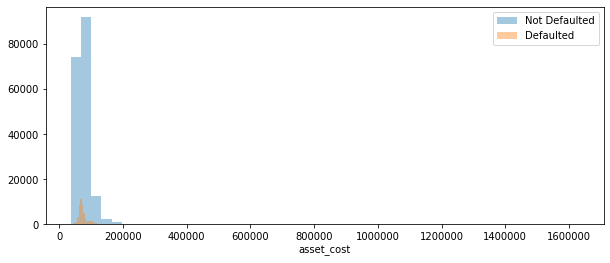

In [19]:
plt.figure(figsize=(10,4))
sns.distplot(df0['asset_cost'],kde=False)
sns.distplot(df1['asset_cost'],kde=False)
plt.legend(labels=['Not Defaulted','Defaulted'])
plt.show()

# LOAN TO VALUE RATIO



Now to know the ltv ratio.

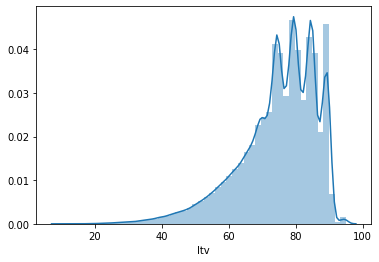

In [20]:
sns.distplot(df['ltv'])

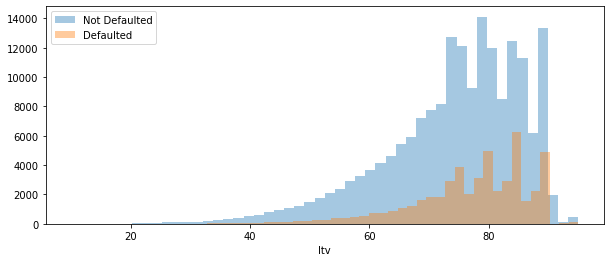

In [21]:
plt.figure(figsize=(10,4))
sns.distplot(df0['ltv'],kde=False)
sns.distplot(df1['ltv'],kde=False)
plt.legend(labels=['Not Defaulted','Defaulted'])
plt.show()

In [22]:
df.head()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,10.831272,10.975071,89.55,67,22807,45,1441,01-01-84,Salaried,03-08-18,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,10.760983,11.090568,73.23,67,22807,45,1502,31-07-85,Self employed,26-09-18,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,10.883279,11.024513,89.63,67,22807,45,1497,24-08-85,Self employed,01-08-18,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,10.959766,11.099121,88.48,67,22807,45,1501,30-12-93,Self employed,26-10-18,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,10.866242,11.007087,88.39,67,22807,45,1495,09-12-77,Self employed,26-09-18,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


# SUPPLIER_ID

In [23]:
len(df['supplier_id'].unique())

2953

Since there are alot of different values in it lets look into it.

In [24]:
supplier_loan=pd.crosstab(df['supplier_id'],df['loan_default'])
supplier_loan

loan_default,0,1
supplier_id,,
10524,3,3
12311,3,0
12312,41,5
12374,85,14
12441,37,10
...,...,...
24794,1,0
24797,1,1
24799,1,0


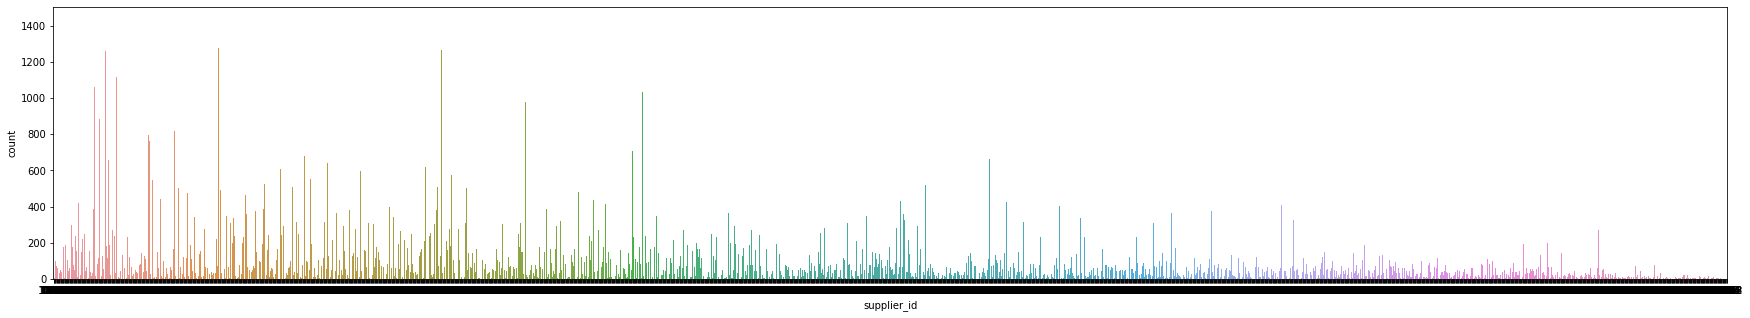

In [25]:
plt.figure(figsize=(30,5))
sns.countplot(df['supplier_id'])

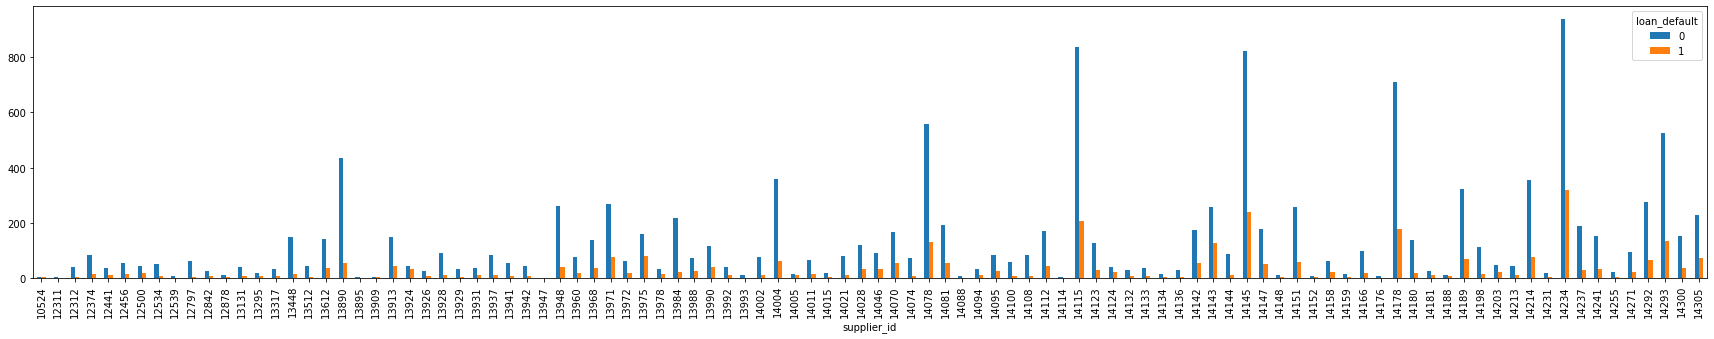

In [26]:
pd.crosstab(df['supplier_id'],df['loan_default']).head(100).plot(kind='bar',figsize=(30,5))

This  gives a basic pattern of the overall supplier_id column and also shows the defaulter and other customer counts.

In [27]:
import  scipy.stats  as  stats

In [28]:
chi_sq, p_value, deg_freedom, exp_freq = stats.chi2_contingency(supplier_loan)
print('Chi Square Statistics',chi_sq)
print('p-value:%0.4f'%p_value)
print('Degree of freedom',deg_freedom)
p_value

Chi Square Statistics 9339.709281561767
p-value:0.0000
Degree of freedom 2952


0.0

# Branch ID

In [29]:
df['branch_id'].value_counts()

2      13138
67     11328
3       9230
5       9218
36      8832
       ...  
217      183
261      176
84       156
111       89
158       69
Name: branch_id, Length: 82, dtype: int64

So there are 82 different entries of 'branchID'

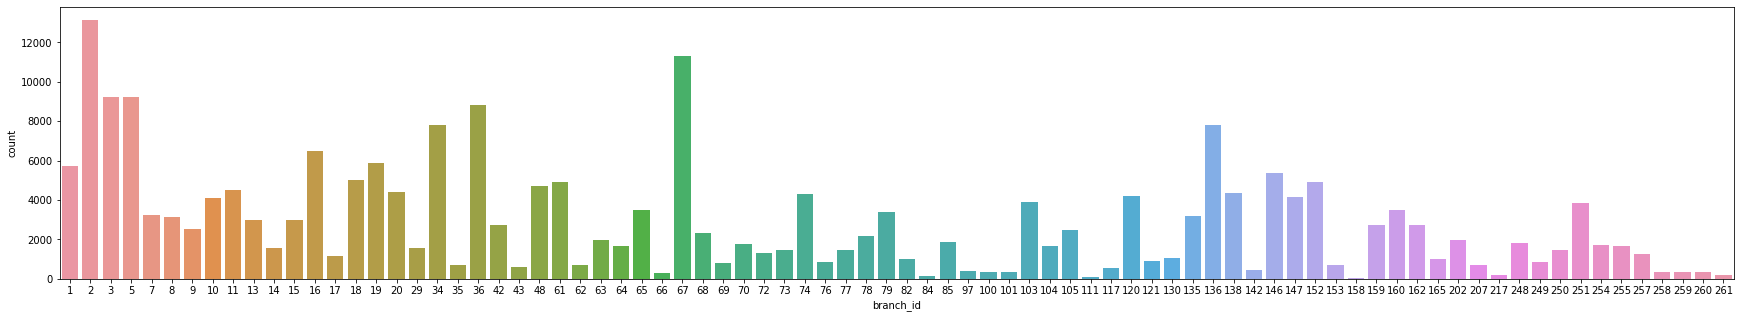

In [30]:
plt.figure(figsize=(30,5))
sns.countplot(df['branch_id'])
plt.show()

In [31]:
branch_var=pd.crosstab(df['branch_id'],df['loan_default'])
branch_var

loan_default,0,1
branch_id,,
1,4856,853
2,10683,2455
3,7616,1614
5,7171,2047
7,2566,656
...,...,...
257,1007,249
258,297,77
259,267,79


In [32]:
chi_sq, p_value, deg_freedom, exp_freq = stats.chi2_contingency(branch_var)
print('Chi Square Statistics',chi_sq)
print('p-value',p_value)
print('Degree of freedom',deg_freedom)

Chi Square Statistics 2930.842784292354
p-value 0.0
Degree of freedom 81


# Manufacturing ID

In [33]:
df['manufacturer_id'].value_counts()

86     109534
45      56626
51      27204
48      16710
49      10220
120      9658
67       2405
145       778
153        12
152         6
156         1
Name: manufacturer_id, dtype: int64

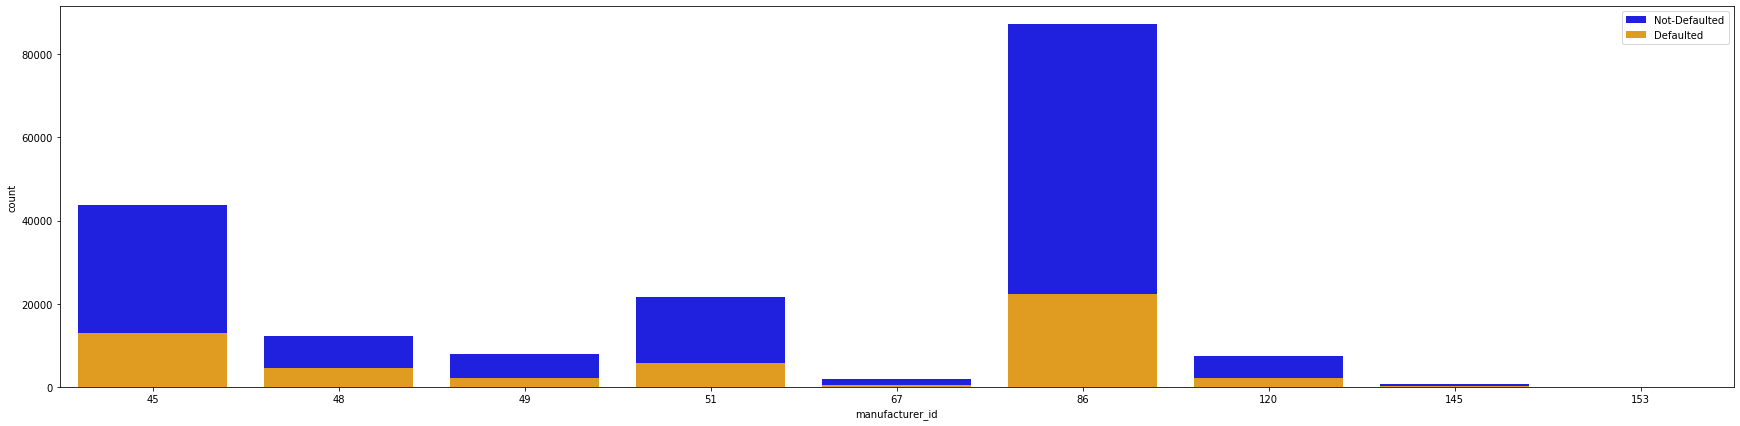

In [34]:
plt.figure(figsize=(30,7))
sns.countplot(df0['manufacturer_id'],color='blue')
sns.countplot(df1['manufacturer_id'],color='orange')
plt.legend(labels=['Not-Defaulted','Defaulted'])
plt.show()

This above plot shows the comparison of number of defaulted and other candidates with different 'manufacturing_id'.

In [35]:
manu_loan=pd.crosstab(df['manufacturer_id'],df['loan_default']) #shows count of defaulted and other entrys.
print(manu_loan)

loan_default         0      1
manufacturer_id              
45               43687  12939
48               12156   4554
49                7984   2236
51               21547   5657
67                1882    523
86               87124  22410
120               7526   2132
145                622    156
152                  6      0
153                  8      4
156                  1      0


In [36]:
chi_sq, p_value, deg_freedom, exp_freq = stats.chi2_contingency(manu_loan)
print('Chi Square Statistics',chi_sq)
print('p-value',p_value)
print('Degree of freedom',deg_freedom)

Chi Square Statistics 464.69764016358414
p-value 1.5277380091688753e-93
Degree of freedom 10


This shows that manufacturing_id is a better prediction capability than the previous two features.Take that note.

Moving to next feature

# Age of disbursal

In [37]:
pres_date='01-01-20' # Present date

def days_between(d1,d2):
    d1=datetime.strptime(d1,'%d-%m-%y')
    d2=datetime.strptime(d2,'%d-%m-%y')
    return abs((d2-d1).days)

Now we are going to convert date to years by counting the years between with respect to the present year.

In [38]:
df['Date.of.Birth']=df['Date.of.Birth'].apply(lambda x:days_between(x,pres_date)/365) # converting date of birth in 
df['DisbursalDate']=df['DisbursalDate'].apply(lambda x:days_between(x,pres_date)/365) # converting disbursed date to the present date

In [39]:
df

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,10.831272,10.975071,89.55,67,22807,45,1441,36.024658,Salaried,1.413699,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,10.760983,11.090568,73.23,67,22807,45,1502,34.443836,Self employed,1.265753,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,10.883279,11.024513,89.63,67,22807,45,1497,34.378082,Self employed,1.419178,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,10.959766,11.099121,88.48,67,22807,45,1501,26.021918,Self employed,1.183562,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,10.866242,11.007087,88.39,67,22807,45,1495,42.090411,Self employed,1.265753,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,11.054265,11.565565,60.72,34,20700,48,1050,31.438356,Salaried,1.183562,...,0,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0
233150,11.207093,11.518908,74.95,34,23775,51,990,31.093151,Self employed,1.191781,...,0,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0
233151,10.418823,11.173417,48.45,77,22186,86,2299,43.613699,Salaried,1.189041,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
233152,10.441705,11.202125,49.10,77,22186,86,2299,25.786301,Salaried,1.257534,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0


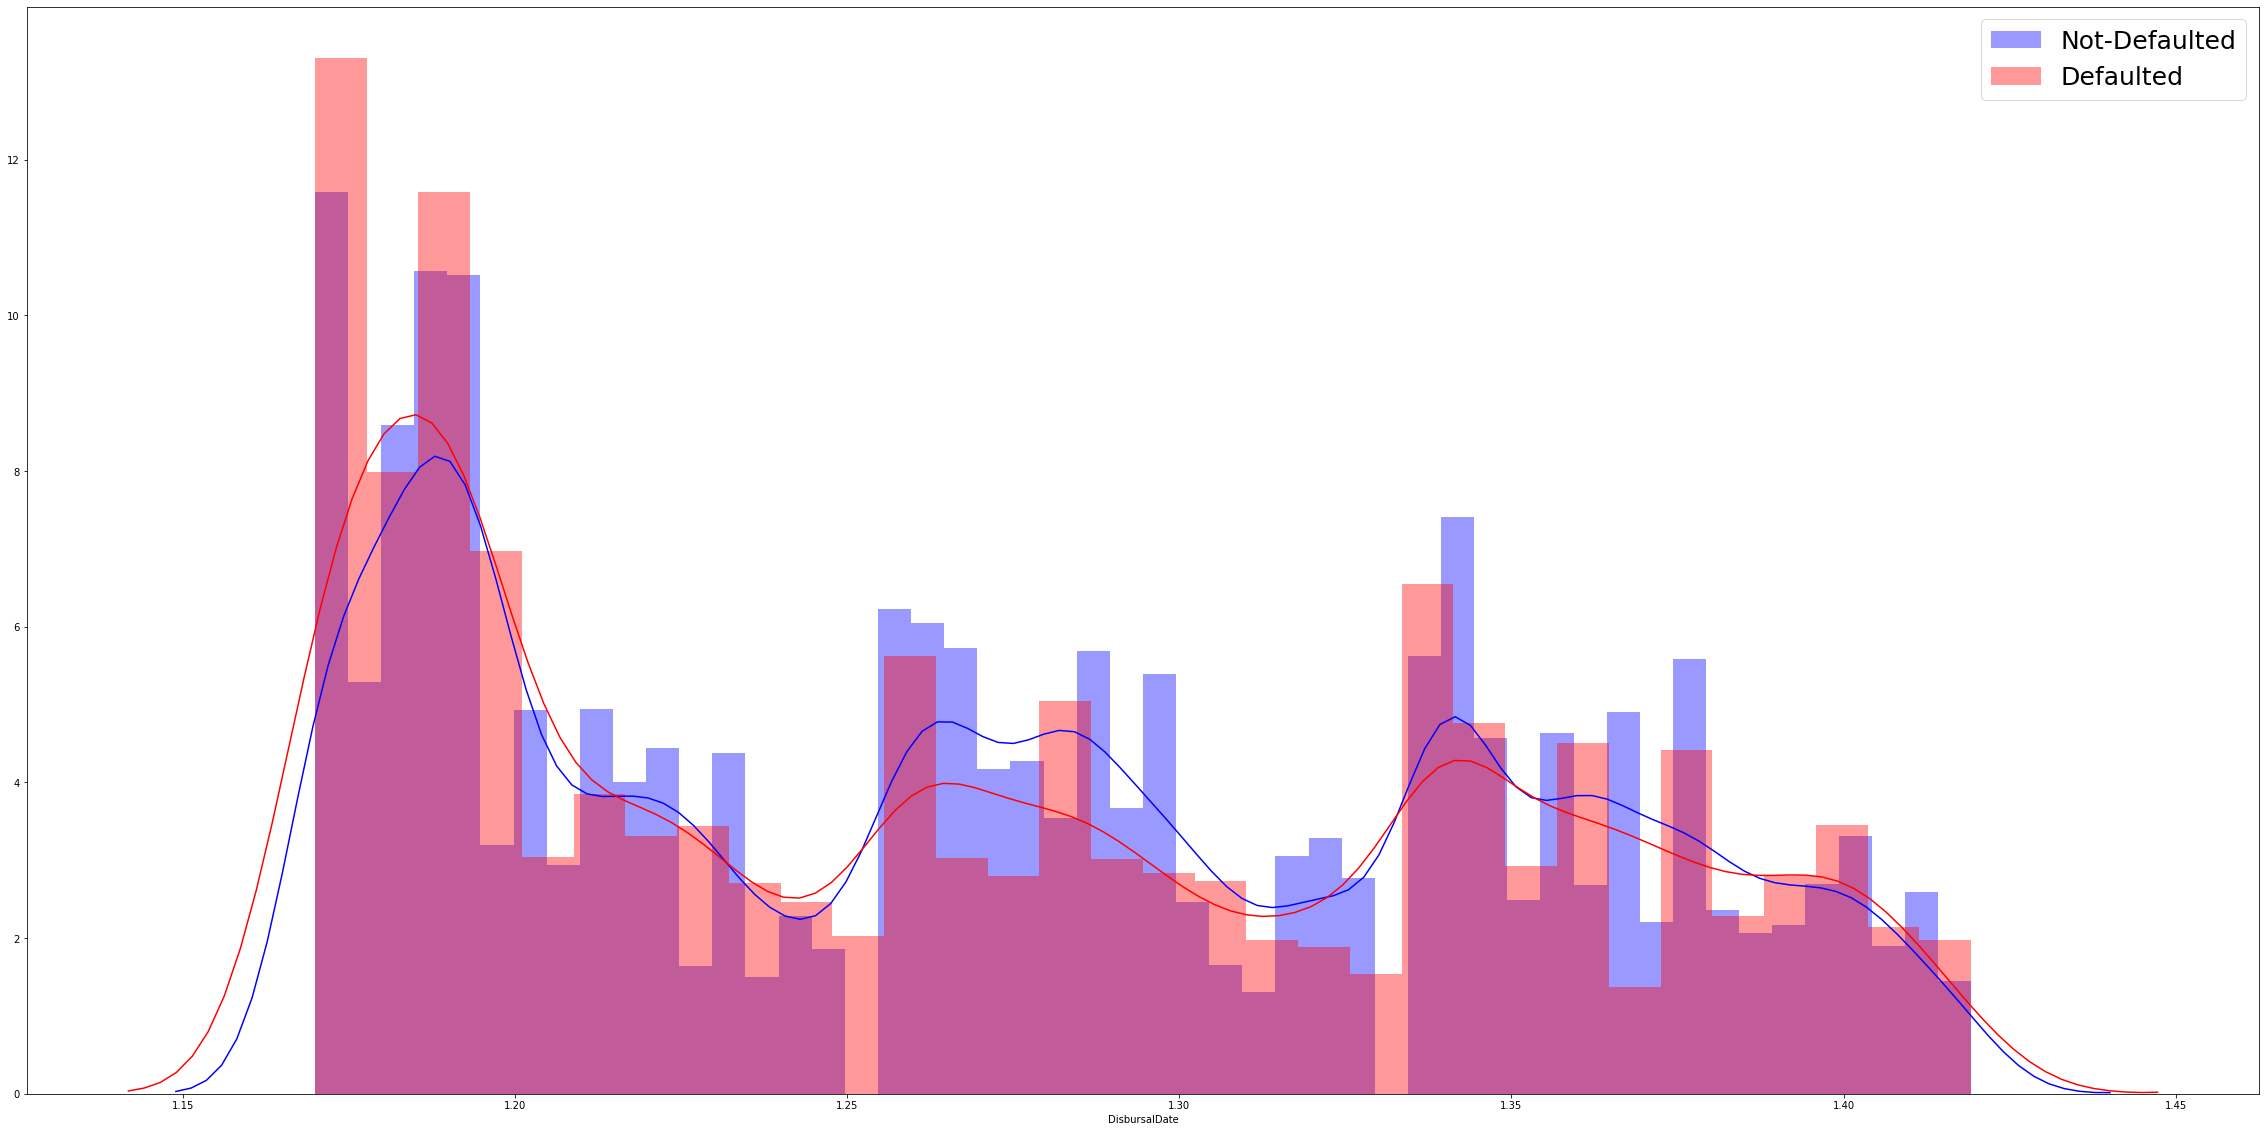

In [40]:
plt.figure(figsize=(40,20))
sns.distplot(df[df['loan_default']==0]['DisbursalDate'],color='b')
sns.distplot(df[df['loan_default']==1]['DisbursalDate'],color='r')
plt.legend(labels=['Not-Defaulted','Defaulted'],prop={'size': 25})
plt.show()

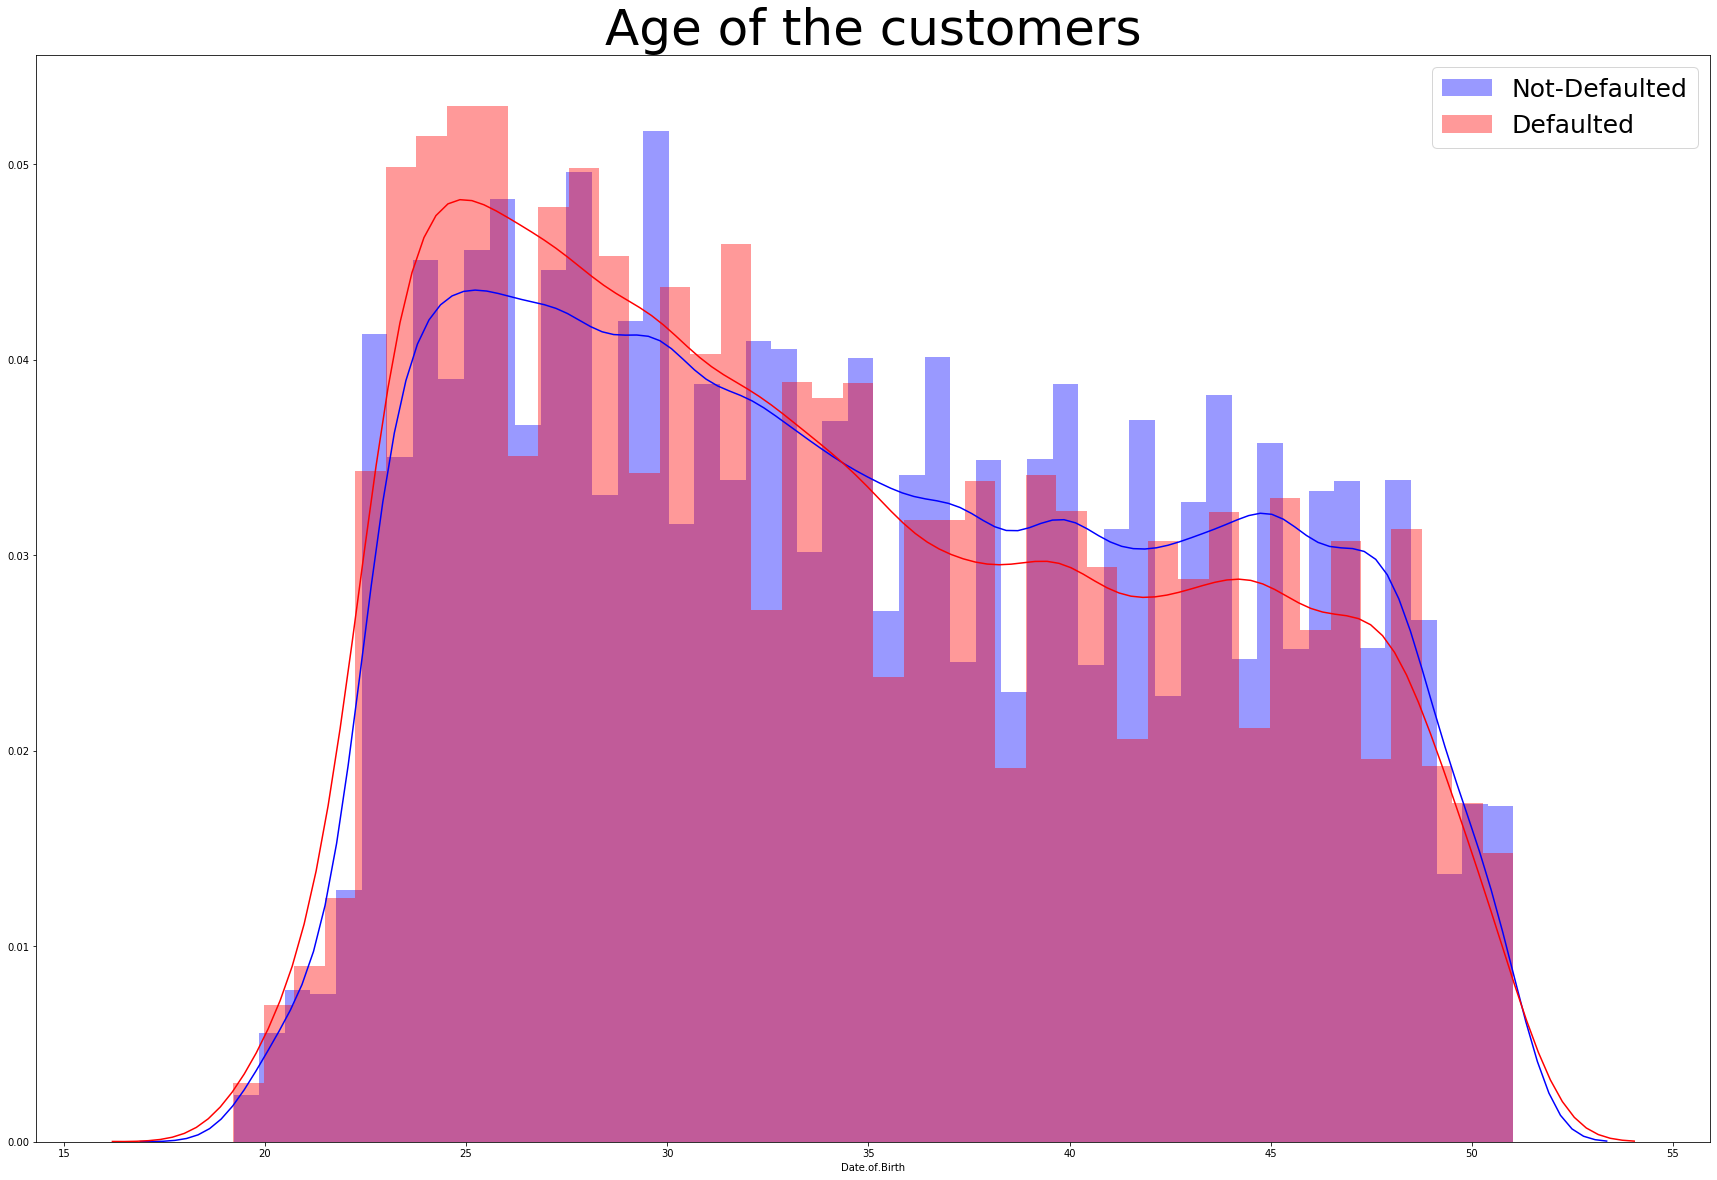

In [41]:
plt.figure(figsize=(30,20))
sns.distplot(df[df['loan_default']==0]['Date.of.Birth'],color='b',kde=True)
sns.distplot(df[df['loan_default']==1]['Date.of.Birth'],color='r',kde=True)
plt.legend(labels=['Not-Defaulted','Defaulted'],prop={'size': 25})
plt.title("Age of the customers",fontsize=50)

plt.show()

Next feature we are going to look into is Employment Type.

# Employment Type

In [42]:
df['Employment.Type'].value_counts()

Self employed    127635
Salaried          97858
Name: Employment.Type, dtype: int64

In [43]:
df['Employment.Type']=df['Employment.Type'].fillna('unknown')

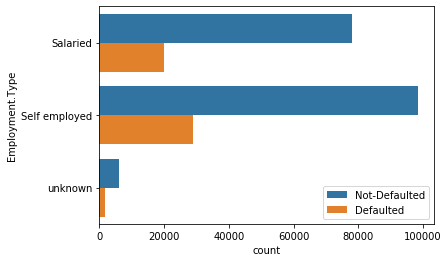

In [44]:
sns.countplot(y='Employment.Type',data=df,hue='loan_default')
plt.legend(labels=['Not-Defaulted','Defaulted'])
plt.show()

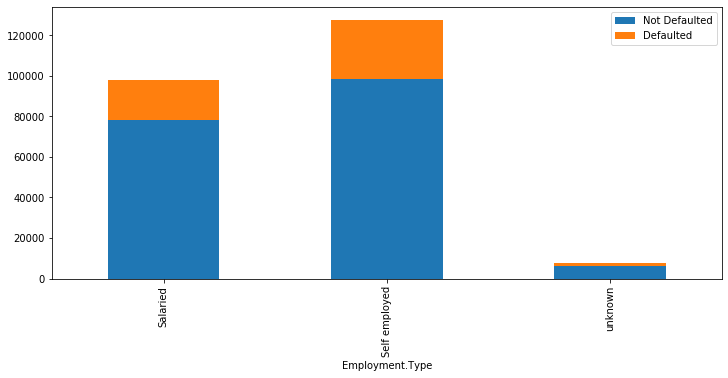

In [45]:
ct=pd.crosstab(df['Employment.Type'], df['loan_default'])
ct.plot.bar(stacked=True,figsize=(12,5))
plt.legend(labels=['Not Defaulted','Defaulted'])
plt.show()

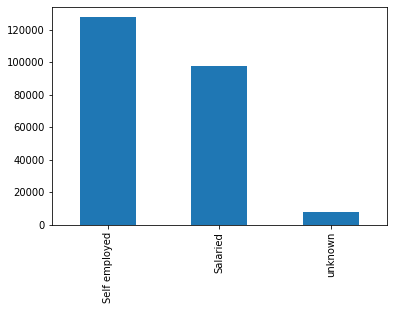

In [46]:
df['Employment.Type'].value_counts().plot(kind='bar')

In [47]:
df['Employment.Type'].value_counts(normalize=True)

Self employed    0.547428
Salaried         0.419714
unknown          0.032858
Name: Employment.Type, dtype: float64

In [48]:
emp_loan=pd.crosstab(df['Employment.Type'],df['loan_default'])
print(emp_loan)

loan_default         0      1
Employment.Type              
Salaried         77948  19910
Self employed    98578  29057
unknown           6017   1644


In [49]:
chi_sq, p_value, deg_freedom, exp_freq = stats.chi2_contingency(emp_loan)
print('Chi Square Statistics',chi_sq)
print('p-value',p_value)
print('Degree of freedom',deg_freedom)

Chi Square Statistics 191.1398528340361
p-value 3.1225422343284505e-42
Degree of freedom 2


# State ID

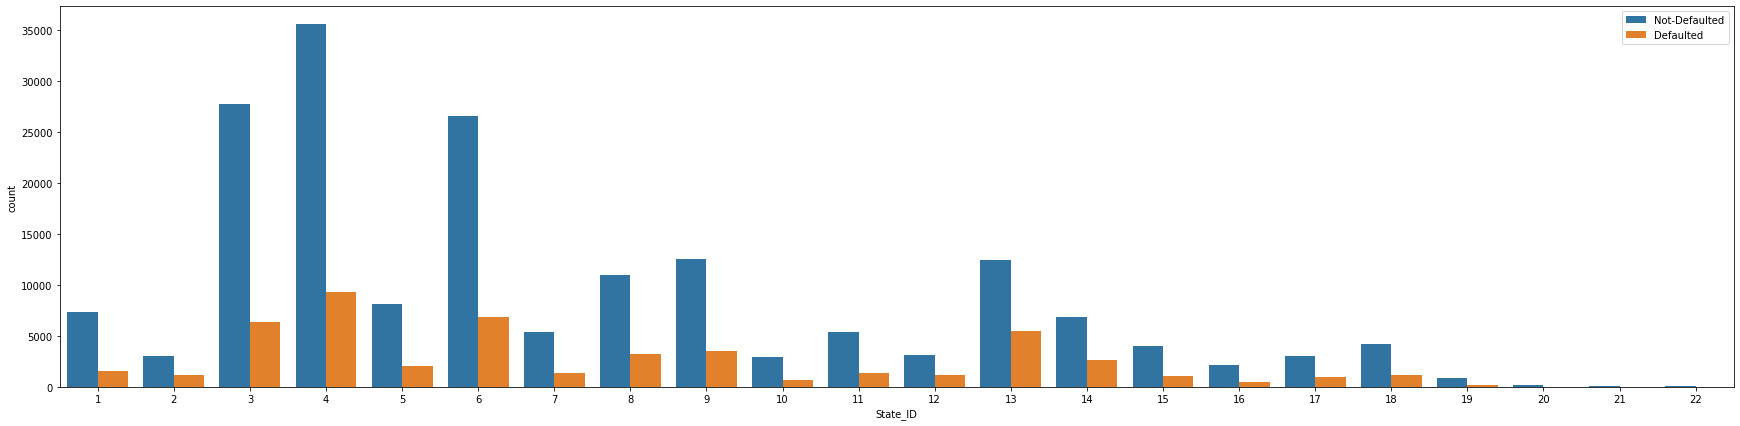

In [50]:
plt.figure(figsize=(30,7))
sns.countplot(x='State_ID',hue='loan_default',data=df)
plt.legend(labels=['Not-Defaulted','Defaulted'])
plt.show()

# Employee ID


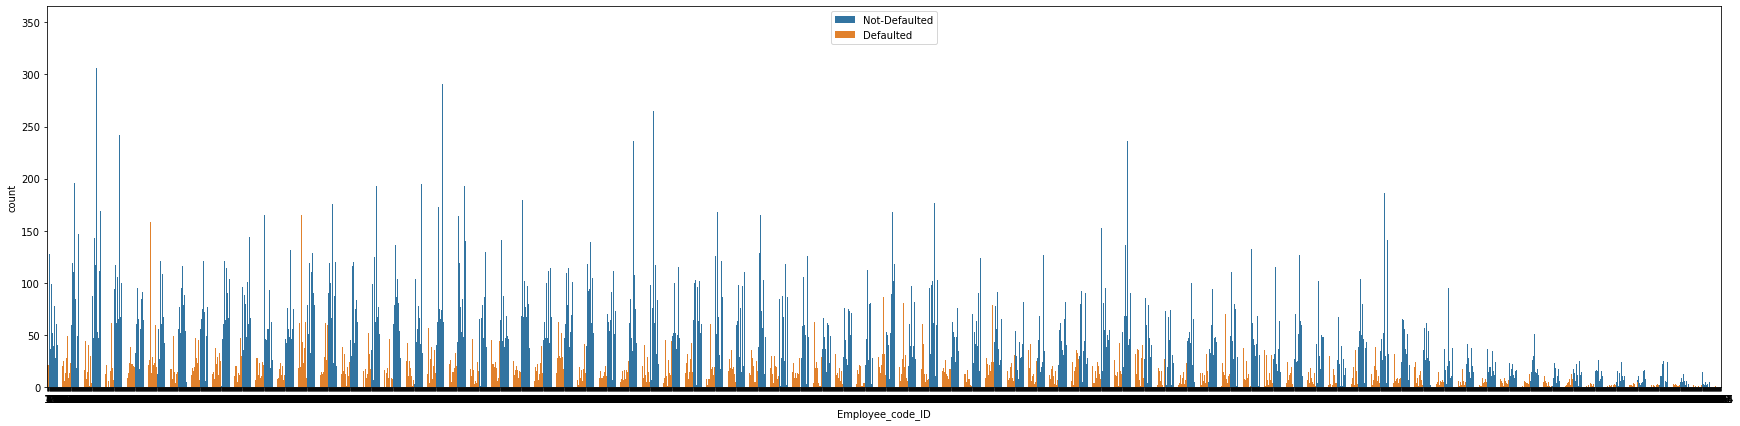

In [51]:
plt.figure(figsize=(30,7))
sns.countplot(x='Employee_code_ID',hue='loan_default',data=df)
plt.legend(labels=['Not-Defaulted','Defaulted'])
plt.show()

    Now lets look at all the ID tags.

In [52]:
df.loc[:,'Aadhar_flag':'Passport_flag']

,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0
...,...,...,...,...,...
233149,0,0,1,0,0
233150,0,0,1,0,0
233151,1,0,0,0,0
233152,1,0,0,0,0


In [53]:
temp=df.loc[:,'Aadhar_flag':'Passport_flag'].columns
print(temp)

Index(['Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag',
       'Passport_flag'],
      dtype='object')


In [54]:
df['Aadhar_flag']+df['PAN_flag']+df['VoterID_flag']+df['Driving_flag']+df['Passport_flag']

0         1
1         1
2         1
3         1
4         1
         ..
233149    1
233150    1
233151    1
233152    1
233153    1
Length: 233154, dtype: int64

In [55]:
df['Flag']=df['Aadhar_flag'].astype('object')+df['PAN_flag'].astype('object')+df['VoterID_flag'].astype('object')+df['Driving_flag'].astype('object')+df['Passport_flag'].astype('object')

In [56]:
df['Flag'].value_counts()

1    213389
2     19434
3       327
4         4
Name: Flag, dtype: int64

In [57]:
df['Flag']=df['Flag'].astype('int32')

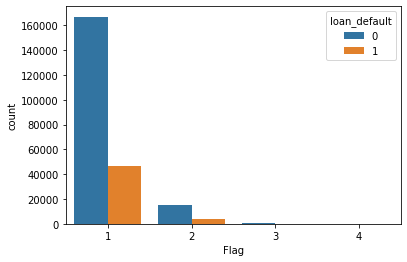

In [58]:
sns.countplot(x='Flag',hue='loan_default',data=df)

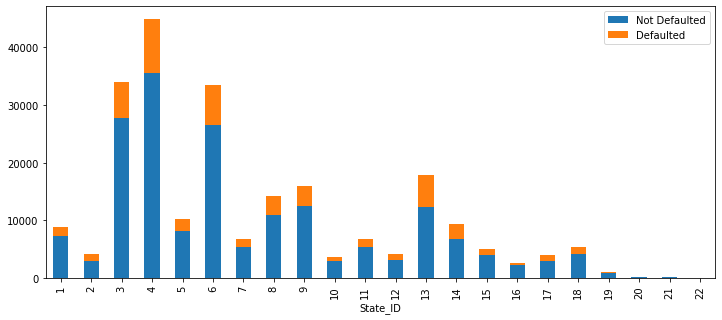

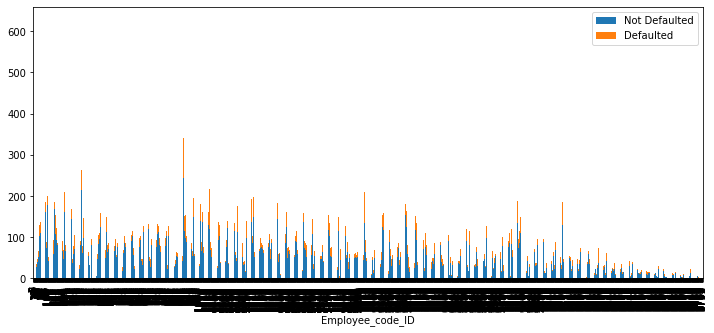

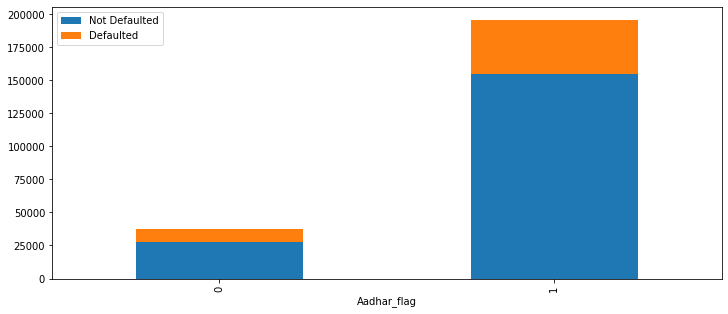

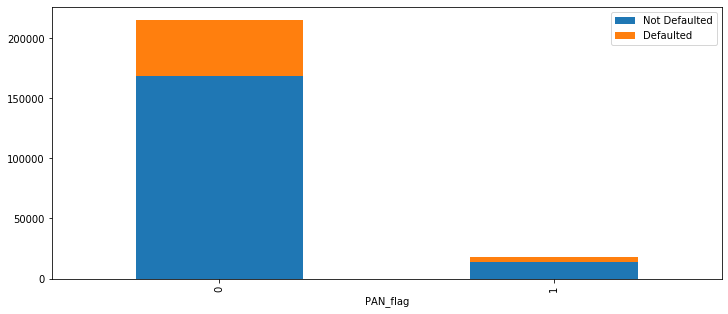

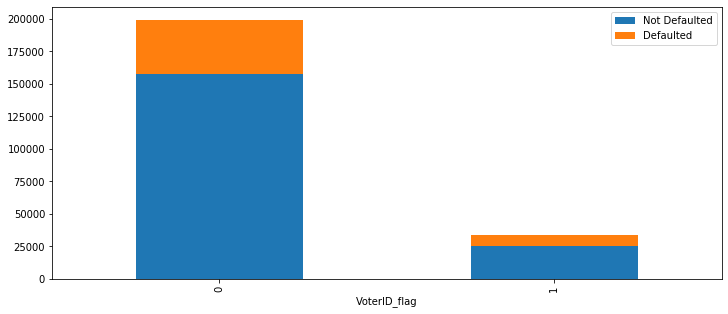

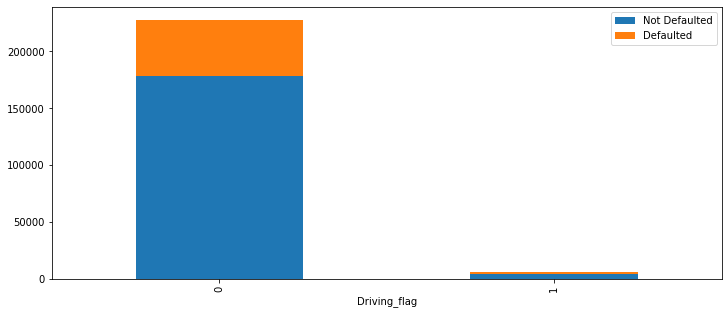

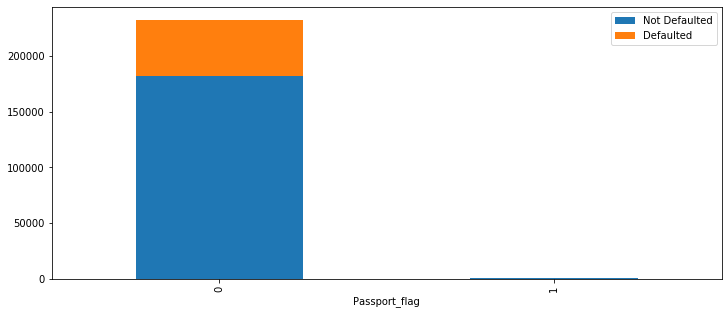

In [59]:
for i in ['State_ID', 'Employee_code_ID','Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag']:
    ct=pd.crosstab(df[i], df['loan_default'])
    ct.plot.bar(stacked=True,figsize=(12,5))
    plt.legend(labels=['Not Defaulted','Defaulted'])
    plt.show()

In [60]:
for i in temp:
    print('Feature:',i)
    chi_sq, p_value, deg_freedom, exp_freq = stats.chi2_contingency(pd.crosstab(df[i],df['loan_default']))
    print('Chi Square Statistics',chi_sq)
    print('p-value',p_value)
    print('Degree of freedom',deg_freedom)
    print()

Feature: Aadhar_flag
Chi Square Statistics 403.0748379341479
p-value 1.1791998402218374e-89
Degree of freedom 1

Feature: PAN_flag
Chi Square Statistics 0.957671117865875
p-value 0.3277743362589148
Degree of freedom 1

Feature: VoterID_flag
Chi Square Statistics 445.90884255981064
p-value 5.603683381655361e-99
Degree of freedom 1

Feature: Driving_flag
Chi Square Statistics 7.808087835127649
p-value 0.0052012912081583085
Degree of freedom 1

Feature: Passport_flag
Chi Square Statistics 13.077913022819462
p-value 0.0002987981770071958
Degree of freedom 1



Since these columns do not provide any significant effect in the result .So we will drop these tags column

In [61]:
df=df.drop(['State_ID', 'Employee_code_ID','Aadhar_flag', 'PAN_flag', 'VoterID_flag', 'Driving_flag', 'Passport_flag'],axis=1)

# Bureau Score

In [62]:
df[['PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION']]

,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION
0,0,No Bureau History Available
1,598,I-Medium Risk
2,0,No Bureau History Available
3,305,L-Very High Risk
4,0,No Bureau History Available
...,...,...
233149,735,D-Very Low Risk
233150,825,A-Very Low Risk
233151,0,No Bureau History Available
233152,0,No Bureau History Available


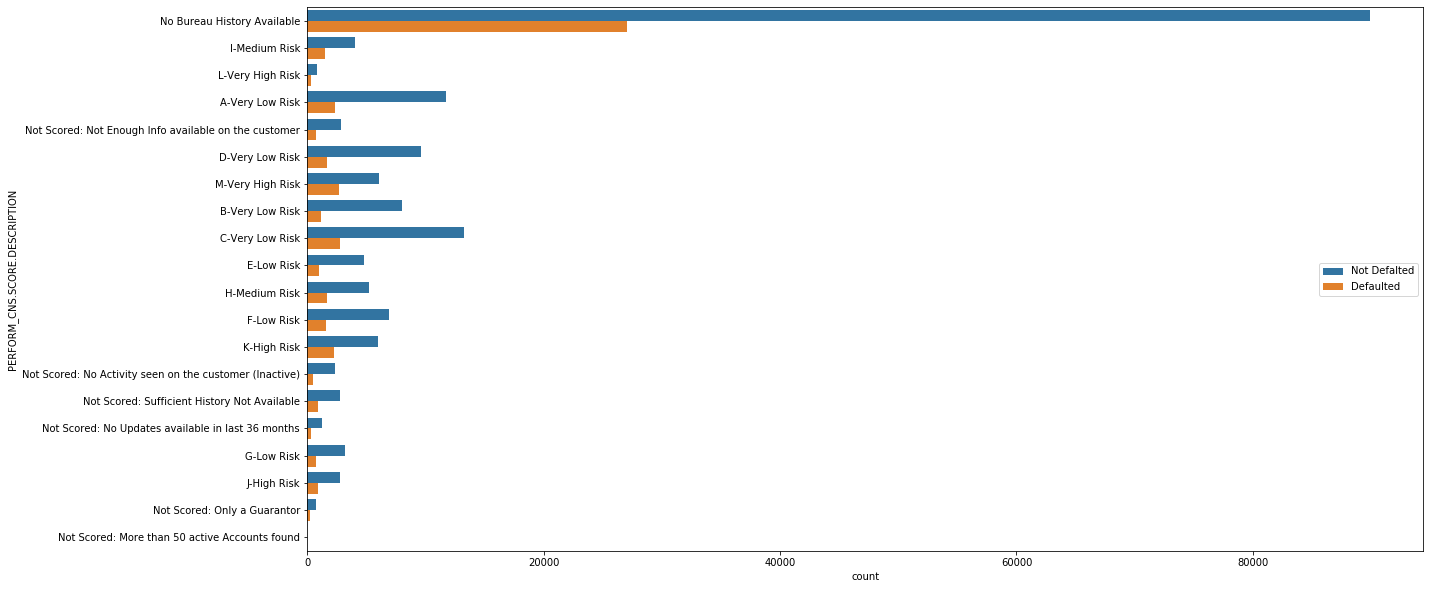

In [63]:
plt.figure(figsize=(20,10))
sns.countplot(y='PERFORM_CNS.SCORE.DESCRIPTION',hue='loan_default',data=df)
plt.legend(labels=['Not Defalted','Defaulted'])
plt.show()

In [64]:
def cns_score(score):
    if score<100:
        return 0
    elif (score>=100) & (score<200):
        return 1
    elif (score>=200) & (score<300):
        return 2
    elif (score>=300) & (score<400):
        return 3
    elif (score>=400) & (score<500):
        return 4
    elif (score>=500) & (score<600):
        return 5
    elif (score>=600) & (score <700):
        return 6
    elif (score>=700) & (score <800):
        return 7
    elif (score>=800) & (score <900):
        return 8
    elif (score>=900) & (score <1000):
        return 9
    else:
        return 10

In [65]:
df['PERFORM_CNS.SCORE'].map(lambda x:cns_score(x)).value_counts()

0    129785
7     37420
6     24215
8     14405
3     11705
5     10175
4      5449
Name: PERFORM_CNS.SCORE, dtype: int64

In [66]:
df['PERFORM_CNS.SCORE']=df['PERFORM_CNS.SCORE'].map(lambda x:cns_score(x))

In [67]:
df[ 'PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

No Bureau History Available                                116950
C-Very Low Risk                                             16045
A-Very Low Risk                                             14124
D-Very Low Risk                                             11358
B-Very Low Risk                                              9201
M-Very High Risk                                             8776
F-Low Risk                                                   8485
K-High Risk                                                  8277
H-Medium Risk                                                6855
E-Low Risk                                                   5821
I-Medium Risk                                                5557
G-Low Risk                                                   3988
Not Scored: Sufficient History Not Available                 3765
J-High Risk                                                  3748
Not Scored: Not Enough Info available on the customer        3672
Not Scored

In [68]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [69]:
df['PERFORM_CNS.SCORE.DESCRIPTION']=le.fit_transform(df['PERFORM_CNS.SCORE.DESCRIPTION'])

In [70]:
df['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

13    116950
2      16045
0      14124
3      11358
1       9201
12      8776
5       8485
10      8277
7       6855
4       5821
8       5557
6       3988
19      3765
9       3748
17      3672
15      2885
16      1534
11      1134
18       976
14         3
Name: PERFORM_CNS.SCORE.DESCRIPTION, dtype: int64

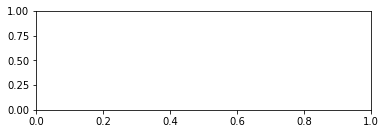

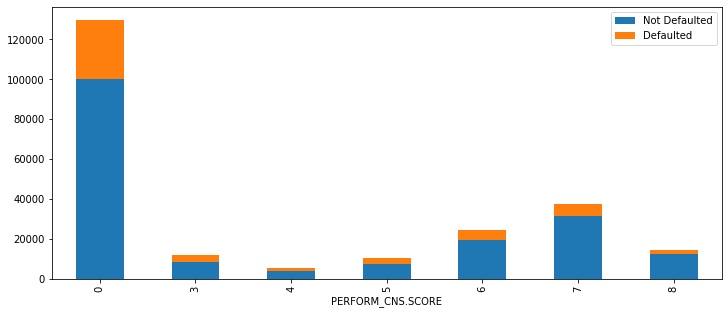

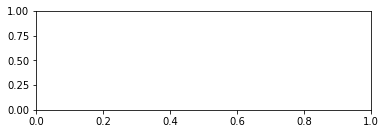

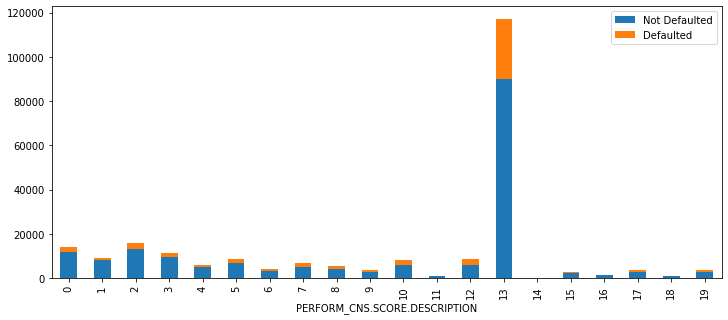

In [71]:
count=1
for i in ['PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION']:
    plt.subplot(2,1,count)
    ct=pd.crosstab(df[i], df['loan_default'])
    ct.plot.bar(stacked=True,figsize=(12,5))
    plt.legend(labels=['Not Defaulted','Defaulted'])
    plt.show()
    count+=1

In [72]:
for i in ['PERFORM_CNS.SCORE', 'PERFORM_CNS.SCORE.DESCRIPTION']:
    print('Feature:',i)
    chi_sq, p_value, deg_freedom, exp_freq = stats.chi2_contingency(pd.crosstab(df[i],df['loan_default']))
    print('Chi Square Statistics',chi_sq)
    print('p-value',p_value)
    print('Degree of freedom',deg_freedom)
    print()

Feature: PERFORM_CNS.SCORE
Chi Square Statistics 1972.6002060532476
p-value 0.0
Degree of freedom 6

Feature: PERFORM_CNS.SCORE.DESCRIPTION
Chi Square Statistics 2192.3575555074094
p-value 0.0
Degree of freedom 19



## PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT'

In [73]:
primary=df.loc[:,[ 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT']]

In [74]:
primary.describe()

,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT
count,233154.000000,233154.000000,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05
mean,2.440636,1.039896,0.156549,1.659001e+05,2.185039e+05,2.180659e+05
std,5.217233,1.941496,0.548787,9.422736e+05,2.374794e+06,2.377744e+06
min,0.000000,0.000000,0.000000,-6.678296e+06,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
75%,3.000000,1.000000,0.000000,3.500650e+04,6.250000e+04,6.080000e+04
max,453.000000,144.000000,25.000000,9.652492e+07,1.000000e+09,1.000000e+09


In [75]:
primary['PRI.NO.OF.ACCTS'].value_counts()

0      116950
1       34978
2       19784
3       13015
4        9323
        ...  
83          1
147         1
120         1
194         1
124         1
Name: PRI.NO.OF.ACCTS, Length: 108, dtype: int64

In [76]:
pri_col=['PRI.CURRENT.BALANCE','PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT']

In [77]:
pmap=df.loc[:,pri_col].corr()

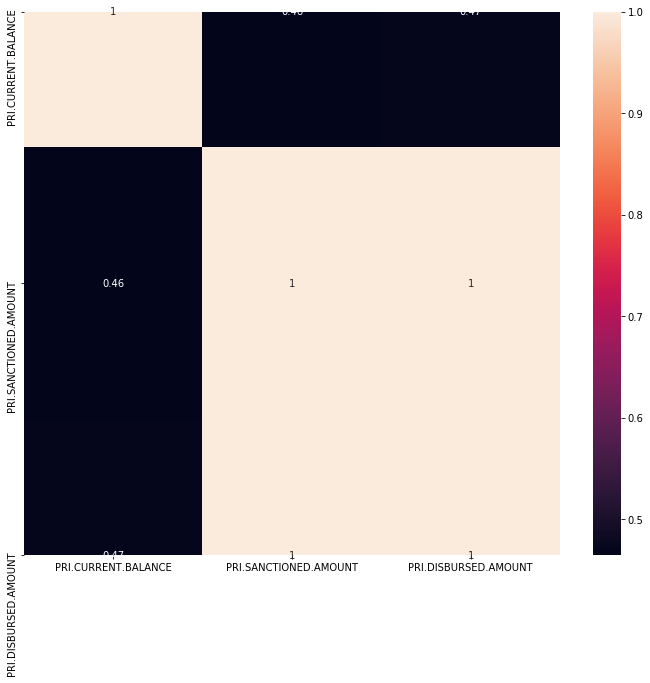

In [78]:
plt.figure(figsize=(12,10))
sns.heatmap(pmap,annot=True)

Now we are going to take a look into the secondary accounts of the entry.


In [79]:
df[['SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT']]

,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
233149,0,0,0,0,0,0
233150,0,0,0,0,0,0
233151,0,0,0,0,0,0
233152,0,0,0,0,0,0


In [80]:
secondary=df[['SEC.NO.OF.ACCTS',
       'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE',
       'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT']]

In [81]:
secondary['SEC.NO.OF.ACCTS'].value_counts()

0     227289
1       3466
2       1036
3        444
4        292
5        148
6        119
7         75
8         68
9         38
10        35
11        29
13        17
12        13
16        11
14        11
15        10
18         6
19         6
17         5
20         4
22         4
23         4
31         4
21         3
46         2
24         2
38         2
30         2
34         2
37         1
42         1
28         1
35         1
29         1
25         1
52         1
Name: SEC.NO.OF.ACCTS, dtype: int64

Now we will combine the data of primary account and secondary account columns into  total account columns .

In [82]:
df

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,...,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default,Flag
0,10.831272,10.975071,89.55,67,22807,45,1441,36.024658,Salaried,1.413699,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1
1,10.760983,11.090568,73.23,67,22807,45,1502,34.443836,Self employed,1.265753,...,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1,1
2,10.883279,11.024513,89.63,67,22807,45,1497,34.378082,Self employed,1.419178,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1
3,10.959766,11.099121,88.48,67,22807,45,1501,26.021918,Self employed,1.183562,...,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1,1
4,10.866242,11.007087,88.39,67,22807,45,1495,42.090411,Self employed,1.265753,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,11.054265,11.565565,60.72,34,20700,48,1050,31.438356,Salaried,1.183562,...,0,4084,0,0,0,1yrs 9mon,3yrs 3mon,0,0,1
233150,11.207093,11.518908,74.95,34,23775,51,990,31.093151,Self employed,1.191781,...,0,1565,0,0,0,0yrs 6mon,0yrs 6mon,0,0,1
233151,10.418823,11.173417,48.45,77,22186,86,2299,43.613699,Salaried,1.189041,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1
233152,10.441705,11.202125,49.10,77,22186,86,2299,25.786301,Salaried,1.257534,...,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0,1


In [83]:
df.loc[:,'total.no.of.accts']=df['PRI.NO.OF.ACCTS']+df['SEC.NO.OF.ACCTS']
df.loc[:,'pri.inactive.accts']=df['PRI.NO.OF.ACCTS']-df['PRI.ACTIVE.ACCTS']
df.loc[:,'sec.inactive.accts']=df['SEC.NO.OF.ACCTS']-df['SEC.ACTIVE.ACCTS']
df.loc[:,'total.inactive.accts']=df['pri.inactive.accts']-df['sec.inactive.accts']
df.loc[:,'total.overdue.accts']=df['PRI.OVERDUE.ACCTS']+df['SEC.OVERDUE.ACCTS']
df.loc[:,'total.current.balance']=df['PRI.CURRENT.BALANCE']+df['SEC.CURRENT.BALANCE']
df.loc[:,'total.disbursed.amount']=df['PRI.DISBURSED.AMOUNT']+df['SEC.CURRENT.BALANCE']
df.loc[:,'total.sanctioned.amount']=df['PRI.SANCTIONED.AMOUNT']+df['SEC.SANCTIONED.AMOUNT']
df.loc[:,'total.installment']=df['PRIMARY.INSTAL.AMT']+df['SEC.SANCTIONED.AMOUNT']
# df.loc[:,'bal.to.disburse']=np.round((1+df['total.disbursed.amount'])/(1+df['total.current.balance']),2) # balance to disbursed anount ratio
df.loc[:,'pri.tenure']=(df['PRI.DISBURSED.AMOUNT']/(df['PRIMARY.INSTAL.AMT']+1)).astype(int)
df.loc[:,'sec.tenure']=(df['SEC.DISBURSED.AMOUNT']/(df['SEC.INSTAL.AMT']+1)).astype(int)
df.loc[:,'disburse.to.sanctioned']=np.round((1+df['total.disbursed.amount'])/(1+df['total.sanctioned.amount']),2)

In [84]:
df

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,...,sec.inactive.accts,total.inactive.accts,total.overdue.accts,total.current.balance,total.disbursed.amount,total.sanctioned.amount,total.installment,pri.tenure,sec.tenure,disburse.to.sanctioned
0,10.831272,10.975071,89.55,67,22807,45,1441,36.024658,Salaried,1.413699,...,0,0,0,0,0,0,0,0,0,1.0
1,10.760983,11.090568,73.23,67,22807,45,1502,34.443836,Self employed,1.265753,...,0,0,1,27600,50200,50200,1991,25,0,1.0
2,10.883279,11.024513,89.63,67,22807,45,1497,34.378082,Self employed,1.419178,...,0,0,0,0,0,0,0,0,0,1.0
3,10.959766,11.099121,88.48,67,22807,45,1501,26.021918,Self employed,1.183562,...,0,3,0,0,0,0,31,0,0,1.0
4,10.866242,11.007087,88.39,67,22807,45,1495,42.090411,Self employed,1.265753,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,11.054265,11.565565,60.72,34,20700,48,1050,31.438356,Salaried,1.183562,...,0,1,0,390443,416133,416133,4084,101,0,1.0
233150,11.207093,11.518908,74.95,34,23775,51,990,31.093151,Self employed,1.191781,...,0,1,0,0,0,0,1565,0,0,1.0
233151,10.418823,11.173417,48.45,77,22186,86,2299,43.613699,Salaried,1.189041,...,0,0,0,0,0,0,0,0,0,1.0
233152,10.441705,11.202125,49.10,77,22186,86,2299,25.786301,Salaried,1.257534,...,0,0,0,0,0,0,0,0,0,1.0


Now to remove the primary and secondary account data

In [85]:
df=df.drop(['PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS', 'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT', 'PRI.DISBURSED.AMOUNT','SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS', 'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT', 'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT'],axis=1)

In [86]:
df

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,...,sec.inactive.accts,total.inactive.accts,total.overdue.accts,total.current.balance,total.disbursed.amount,total.sanctioned.amount,total.installment,pri.tenure,sec.tenure,disburse.to.sanctioned
0,10.831272,10.975071,89.55,67,22807,45,1441,36.024658,Salaried,1.413699,...,0,0,0,0,0,0,0,0,0,1.0
1,10.760983,11.090568,73.23,67,22807,45,1502,34.443836,Self employed,1.265753,...,0,0,1,27600,50200,50200,1991,25,0,1.0
2,10.883279,11.024513,89.63,67,22807,45,1497,34.378082,Self employed,1.419178,...,0,0,0,0,0,0,0,0,0,1.0
3,10.959766,11.099121,88.48,67,22807,45,1501,26.021918,Self employed,1.183562,...,0,3,0,0,0,0,31,0,0,1.0
4,10.866242,11.007087,88.39,67,22807,45,1495,42.090411,Self employed,1.265753,...,0,0,0,0,0,0,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,11.054265,11.565565,60.72,34,20700,48,1050,31.438356,Salaried,1.183562,...,0,1,0,390443,416133,416133,4084,101,0,1.0
233150,11.207093,11.518908,74.95,34,23775,51,990,31.093151,Self employed,1.191781,...,0,1,0,0,0,0,1565,0,0,1.0
233151,10.418823,11.173417,48.45,77,22186,86,2299,43.613699,Salaried,1.189041,...,0,0,0,0,0,0,0,0,0,1.0
233152,10.441705,11.202125,49.10,77,22186,86,2299,25.786301,Salaried,1.257534,...,0,0,0,0,0,0,0,0,0,1.0


 ##  NEW ACCOUNTS INLAST SIX MONTHS

In [87]:
df['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts()

0     181494
1      32099
2      11015
3       4458
4       1957
5        964
6        480
7        302
8        147
9         79
10        55
11        31
12        20
13        15
14        11
16         6
17         6
20         3
15         2
18         2
19         2
23         2
28         1
21         1
22         1
35         1
Name: NEW.ACCTS.IN.LAST.SIX.MONTHS, dtype: int64

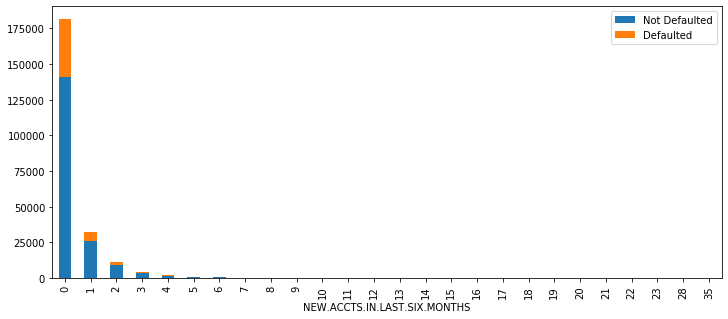

In [88]:
ct=pd.crosstab(df['NEW.ACCTS.IN.LAST.SIX.MONTHS'], df['loan_default'])
ct.plot.bar(stacked=True,figsize=(12,5))
plt.legend(labels=['Not Defaulted','Defaulted'])
plt.show()

## LOANS DEFAULTED IN LAST SIXMONTHS


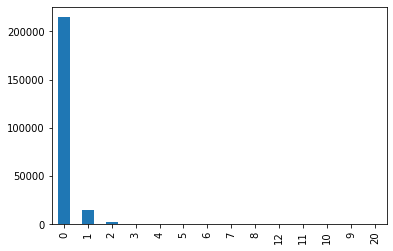

In [89]:
df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts().plot(kind='bar')

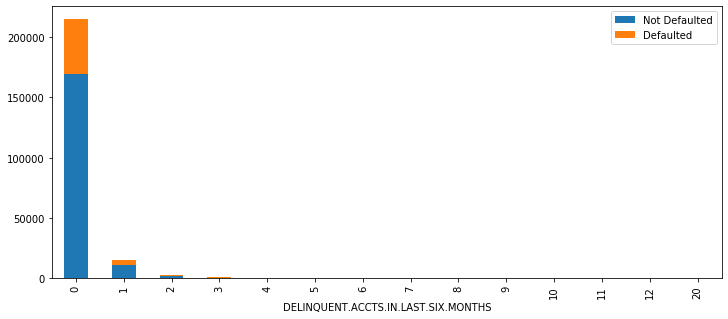

In [90]:
ct=pd.crosstab(df['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'], df['loan_default'])
ct.plot.bar(stacked=True,figsize=(12,5))
plt.legend(labels=['Not Defaulted','Defaulted'])
plt.show()

## AVERAGE LOAN TENURE


Here we are going to convert the average loan tenure in terms of months for better comparison.

In [91]:
df['AVERAGE.ACCT.AGE']

0          0yrs 0mon
1         1yrs 11mon
2          0yrs 0mon
3          0yrs 8mon
4          0yrs 0mon
             ...    
233149     1yrs 9mon
233150     0yrs 6mon
233151     0yrs 0mon
233152     0yrs 0mon
233153     0yrs 0mon
Name: AVERAGE.ACCT.AGE, Length: 233154, dtype: object

In [92]:
df['AVERAGE.ACCT.AGE']=df['AVERAGE.ACCT.AGE'].apply(lambda x:(re.sub('[a-z]','',x)).split())
df['AVERAGE.ACCT.AGE']=df['AVERAGE.ACCT.AGE'].apply(lambda x:int(x[0])*12+int(x[1]))

In [93]:
df['AVERAGE.ACCT.AGE']  #DISPLAYING THE LOAN TENURE IN MONTHS

0          0
1         23
2          0
3          8
4          0
          ..
233149    21
233150     6
233151     0
233152     0
233153     0
Name: AVERAGE.ACCT.AGE, Length: 233154, dtype: int64

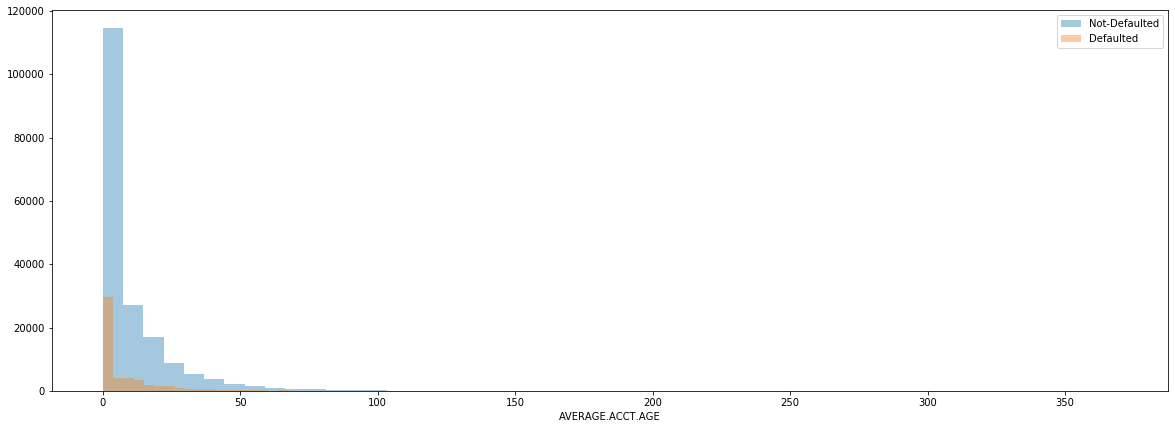

In [94]:
plt.figure(figsize=(20,7))
sns.distplot(df[df['loan_default']==0]['AVERAGE.ACCT.AGE'],kde=False)
sns.distplot(df[df['loan_default']==1]['AVERAGE.ACCT.AGE'],kde=False)
plt.legend(labels=['Not-Defaulted','Defaulted'])
plt.show()

##  CREDIT.HISTORY.LENGTH

Here too we are going to convert the credit history in terms of months

In [95]:
df['CREDIT.HISTORY.LENGTH']

0          0yrs 0mon
1         1yrs 11mon
2          0yrs 0mon
3          1yrs 3mon
4          0yrs 0mon
             ...    
233149     3yrs 3mon
233150     0yrs 6mon
233151     0yrs 0mon
233152     0yrs 0mon
233153     0yrs 0mon
Name: CREDIT.HISTORY.LENGTH, Length: 233154, dtype: object

In [96]:
df['CREDIT.HISTORY.LENGTH']=df['CREDIT.HISTORY.LENGTH'].apply(lambda x:
                                                                   (re.sub('[a-z]','',x)).split())
df['CREDIT.HISTORY.LENGTH']=df['CREDIT.HISTORY.LENGTH'].apply(lambda x:
                                                                   int(x[0])*12+int(x[1]))

In [97]:
df['CREDIT.HISTORY.LENGTH']

0          0
1         23
2          0
3         15
4          0
          ..
233149    39
233150     6
233151     0
233152     0
233153     0
Name: CREDIT.HISTORY.LENGTH, Length: 233154, dtype: int64

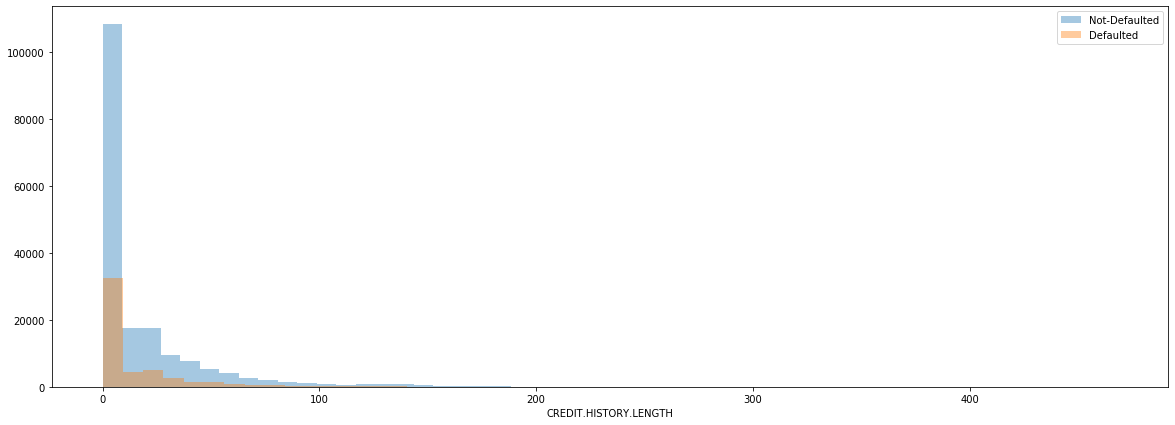

In [98]:
plt.figure(figsize=(20,7))
sns.distplot(df[df['loan_default']==0]['CREDIT.HISTORY.LENGTH'],kde=False)
sns.distplot(df[df['loan_default']==1]['CREDIT.HISTORY.LENGTH'],kde=False)
plt.legend(labels=['Not-Defaulted','Defaulted'])
plt.show()

## Number of Enquiries

In [99]:
df['NO.OF_INQUIRIES'].value_counts()

0     201961
1      22285
2       5409
3       1767
4        760
5        343
6        239
7        135
8        105
9         44
10        34
11        15
12        14
14         8
15         7
13         6
19         6
17         4
18         4
16         3
28         1
20         1
22         1
23         1
36         1
Name: NO.OF_INQUIRIES, dtype: int64

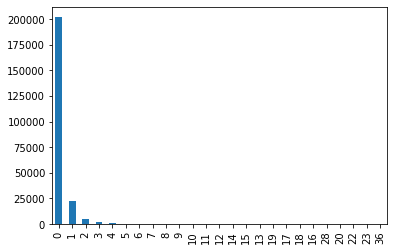

In [100]:
df['NO.OF_INQUIRIES'].value_counts().plot(kind='bar')

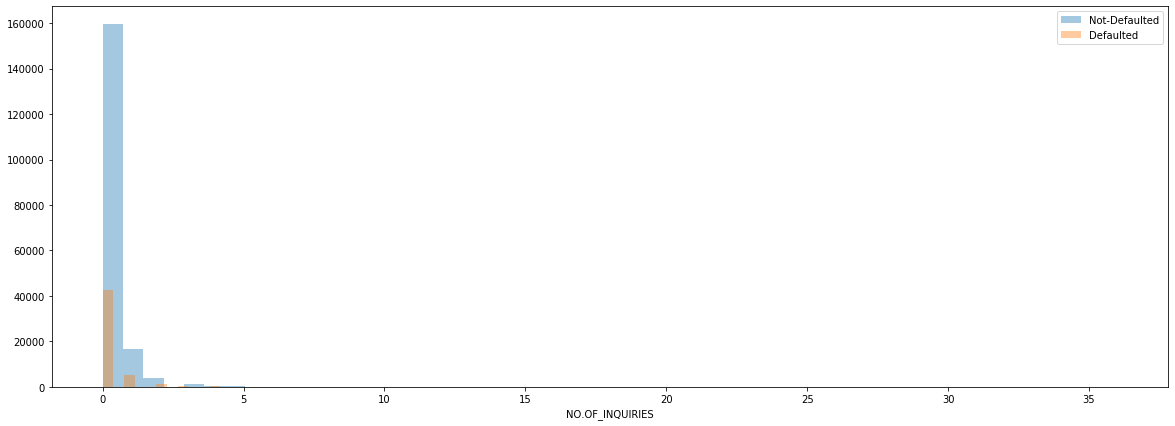

In [101]:
plt.figure(figsize=(20,7))
sns.distplot(df[df['loan_default']==0]['NO.OF_INQUIRIES'],kde=False)
sns.distplot(df[df['loan_default']==1]['NO.OF_INQUIRIES'],kde=False)
plt.legend(labels=['Not-Defaulted','Defaulted'])
plt.show()

In [102]:
df.corr()

,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,DisbursalDate,PERFORM_CNS.SCORE,...,sec.inactive.accts,total.inactive.accts,total.overdue.accts,total.current.balance,total.disbursed.amount,total.sanctioned.amount,total.installment,pri.tenure,sec.tenure,disburse.to.sanctioned
disbursed_amount,1.000000,0.674899,0.489854,0.016748,0.063987,0.117299,0.054188,-0.056970,-0.152740,0.011942,...,-0.011772,0.029793,0.019156,0.012642,0.005070,0.004805,-0.002800,-0.000061,-0.002563,0.000165
asset_cost,0.674899,1.000000,-0.299971,0.012914,0.152053,0.031176,0.310365,-0.132627,-0.183955,-0.054774,...,-0.022367,-0.024032,-0.020756,-0.008948,-0.003180,-0.003401,-0.012715,0.001425,-0.007194,-0.000876
ltv,0.489854,-0.299971,1.000000,0.006382,-0.103732,0.121003,-0.300112,0.086484,0.032219,0.084243,...,0.011891,0.069563,0.052354,0.027474,0.010657,0.010593,0.011406,-0.001699,0.005779,0.001063
branch_id,0.016748,0.012914,0.006382,1.000000,0.225744,-0.049957,0.048192,-0.002251,0.004279,-0.018365,...,-0.003412,-0.010167,-0.006790,-0.003802,-0.003300,-0.003172,0.004982,-0.001994,0.001052,-0.002370
supplier_id,0.063987,0.152053,-0.103732,0.225744,1.000000,-0.063916,0.187401,-0.034541,-0.026958,-0.076874,...,-0.024395,-0.057482,-0.044592,-0.023694,-0.013530,-0.013690,-0.015372,-0.003445,-0.006172,-0.002669
manufacturer_id,0.117299,0.031176,0.121003,-0.049957,-0.063916,1.000000,-0.104349,0.053641,0.021860,0.072428,...,0.008374,0.056928,0.026876,0.031662,0.017245,0.017422,0.011400,0.005373,0.003407,-0.000911
Current_pincode_ID,0.054188,0.310365,-0.300112,0.048192,0.187401,-0.104349,1.000000,-0.074051,-0.029529,-0.160360,...,-0.041162,-0.049447,-0.067583,-0.058600,-0.027114,-0.027745,-0.018534,-0.003622,-0.015458,-0.000831
Date.of.Birth,-0.056970,-0.132627,0.086484,-0.002251,-0.034541,0.053641,-0.074051,1.000000,-0.005351,0.176936,...,0.025974,0.157686,0.142366,0.088428,0.049695,0.049852,0.041727,0.010947,0.010542,0.003188
DisbursalDate,-0.152740,-0.183955,0.032219,0.004279,-0.026958,0.021860,-0.029529,-0.005351,1.000000,0.011065,...,0.037656,0.002883,0.013677,0.008662,0.002900,0.003599,0.019029,-0.001657,0.012215,-0.000428
PERFORM_CNS.SCORE,0.011942,-0.054774,0.084243,-0.018365,-0.076874,0.072428,-0.160360,0.176936,0.011065,1.000000,...,0.048064,0.320485,0.109291,0.144228,0.077403,0.078436,0.062624,0.021135,0.014945,0.001725


# Loan Default (Target value)

0    182543
1     50611
Name: loan_default, dtype: int64


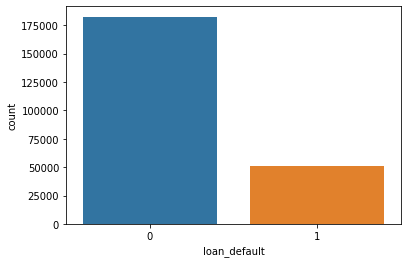

In [103]:
print(df['loan_default'].value_counts())
sns.countplot(df['loan_default'])
plt.show()

In [104]:
df['loan_default'].value_counts(normalize=True)

0    0.782929
1    0.217071
Name: loan_default, dtype: float64

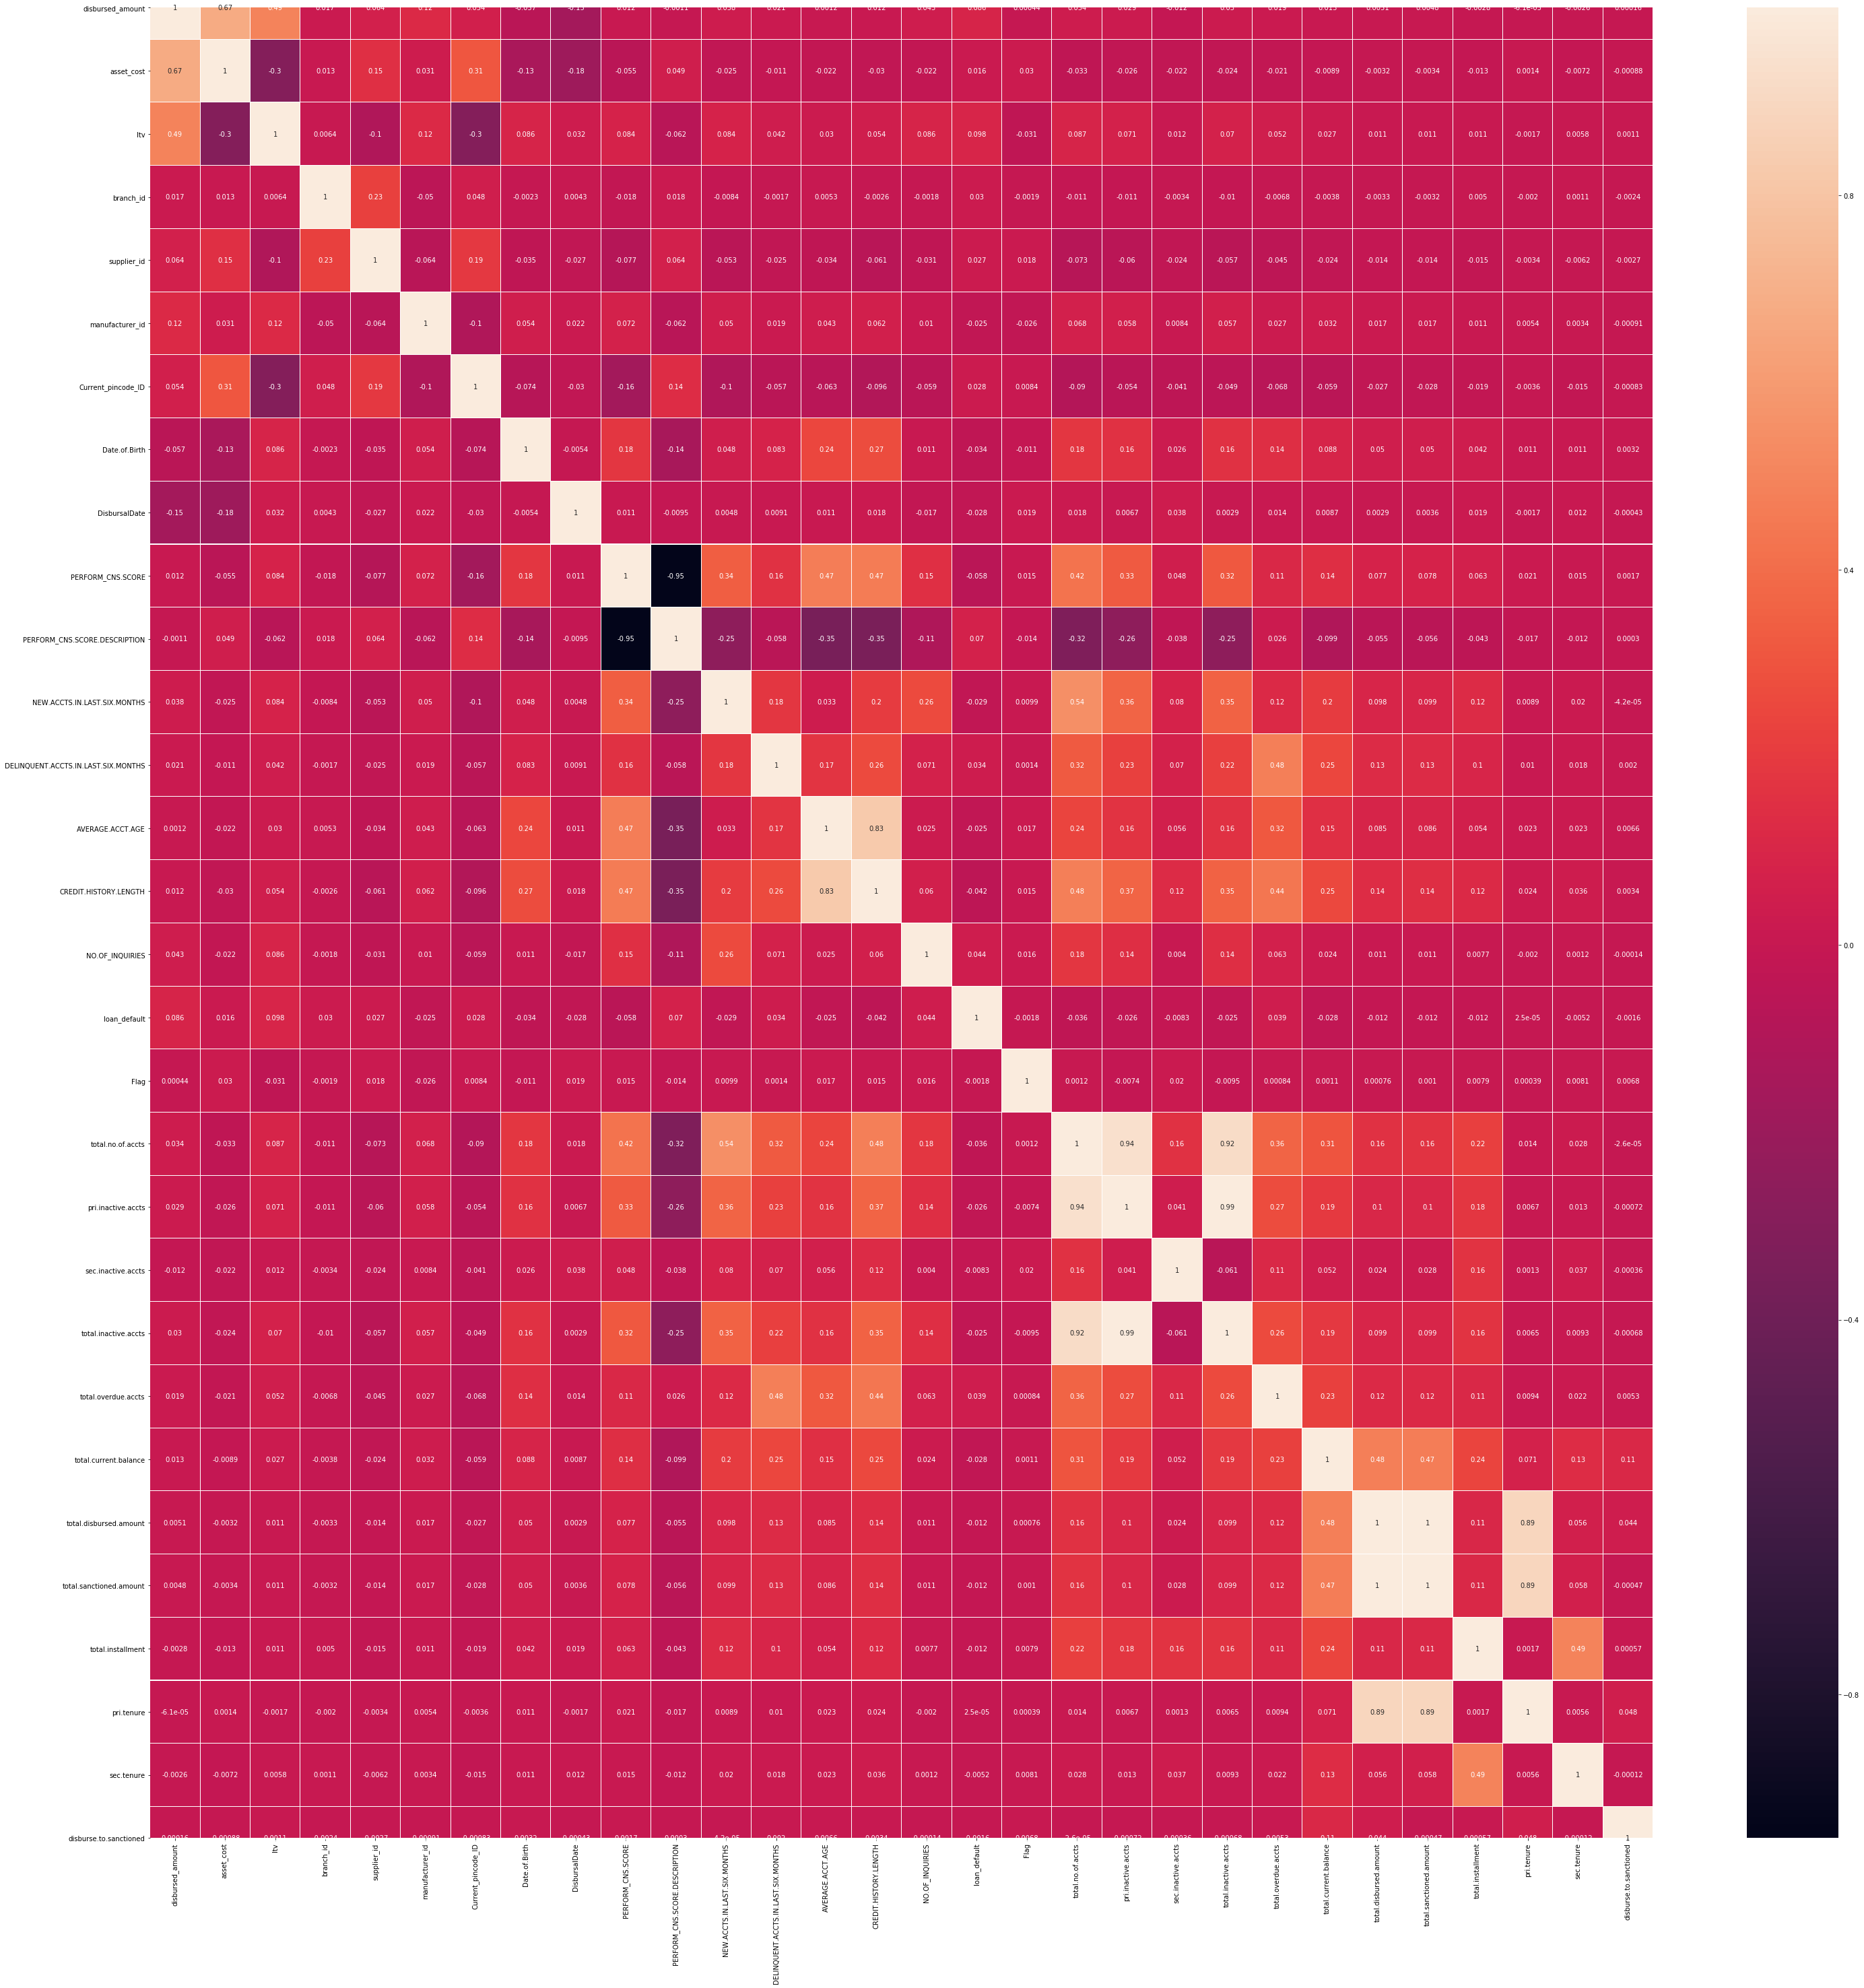

In [105]:
plt.figure(figsize=(50,50))
sns.heatmap(df.corr(),linewidths=0.05,annot=True)
plt.show()

In [106]:
df=df.drop(['supplier_id','branch_id','Current_pincode_ID'],axis=1)

In [107]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)

In [108]:
ohe.fit_transform(df[['Employment.Type']])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [109]:
temp=pd.DataFrame(ohe.fit_transform(df[['Employment.Type']]),columns=ohe.categories_[0])

Here we used the OneHotEncoding technique to replace the employment_type .

In [110]:
manu =pd.get_dummies(df['manufacturer_id'], columns=['manufacturer_id'], drop_first=False)
print(manu)

        45   48   49   51   67   86   120  145  152  153  156
0         1    0    0    0    0    0    0    0    0    0    0
1         1    0    0    0    0    0    0    0    0    0    0
2         1    0    0    0    0    0    0    0    0    0    0
3         1    0    0    0    0    0    0    0    0    0    0
4         1    0    0    0    0    0    0    0    0    0    0
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
233149    0    1    0    0    0    0    0    0    0    0    0
233150    0    0    0    1    0    0    0    0    0    0    0
233151    0    0    0    0    0    1    0    0    0    0    0
233152    0    0    0    0    0    1    0    0    0    0    0
233153    0    0    0    0    0    1    0    0    0    0    0

[233154 rows x 11 columns]


Then create  dummy columns for different manufacturer_id  for better understanding

In [111]:
df=df.drop(['Employment.Type','manufacturer_id'],axis=1)

In [112]:
df=pd.concat([df,manu],axis=1)

In [113]:
df=pd.concat([df,temp],axis=1)

In [114]:
df.head()

,disbursed_amount,asset_cost,ltv,Date.of.Birth,DisbursalDate,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,...,67,86,120,145,152,153,156,Salaried,Self employed,unknown
0,10.831272,10.975071,89.55,36.024658,1.413699,0,13,0,0,0,...,0,0,0,0,0,0,0,1.0,0.0,0.0
1,10.760983,11.090568,73.23,34.443836,1.265753,5,8,0,1,23,...,0,0,0,0,0,0,0,0.0,1.0,0.0
2,10.883279,11.024513,89.63,34.378082,1.419178,0,13,0,0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
3,10.959766,11.099121,88.48,26.021918,1.183562,3,11,0,0,8,...,0,0,0,0,0,0,0,0.0,1.0,0.0
4,10.866242,11.007087,88.39,42.090411,1.265753,0,13,0,0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0


So now we are finally done with the preprocessing part of the project.

# Training and Testing 


In [115]:
y=df['loan_default']
X=df.drop(['loan_default'],axis=1)

In [116]:
X.shape

(233154, 39)

In [117]:
y.shape

(233154,)

In [118]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
!pip install xgboost
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

In [120]:
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(criterion='entropy',random_state=0),
    DecisionTreeClassifier(criterion='gini',random_state=0),
    RandomForestClassifier(n_estimators=100),
    GaussianNB(),
    BaggingClassifier(random_state=0),
    AdaBoostClassifier(),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,
                  n_estimators=100, max_depth=3)
]

In [121]:
results = []
for item in classifiers:
    print(item,"\n")
    clf = item
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    #print(y_pred)
    #results.append(accuracy_score(y_test,y_pred))
    results.append(y_pred)
    print("accuracy train:",clf.score(X_train,y_train),"\n")
    print("accuracy test:",clf.score(X_test,y_test),"\n")
    print("precision :",precision_score(y_test,y_pred),"\n")
    print('Recall score:',recall_score(y_test,y_pred),'\n')
    print("f1 score:",f1_score(y_test,y_pred),"\n")
    from sklearn.metrics import classification_report
    print(classification_report(y_test,y_pred))
    print("-------------------------------------------------------------------------------------------------------")

LogisticRegression() 



C:\Users\Rahul singh\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[54722    57]
 [15161     7]]
accuracy train: 0.7821539517300116 

accuracy test: 0.782435272420547 

precision : 0.109375 

Recall score: 0.00046149789029535865 

f1 score: 0.0009191176470588235 

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54779
           1       0.11      0.00      0.00     15168

    accuracy                           0.78     69947
   macro avg       0.45      0.50      0.44     69947
weighted avg       0.64      0.78      0.69     69947

-------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(criterion='entropy', random_state=0) 

[[42928 11851]
 [11156  4012]]
accuracy train: 0.9999877456236559 

accuracy test: 0.6710795316453887 

precision : 0.25291558973712414 

Recall score: 0.2645042194092827 

f1 score: 0.2585801295478715 

              precision    recall  f1-score   support

           0       0.79      0.78      0.79     5

Now lets see if there is any difference in the accuracy if we standardise the data.

In [122]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [123]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [124]:
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(criterion='entropy',random_state=0),
    DecisionTreeClassifier(criterion='gini',random_state=0),
    RandomForestClassifier(n_estimators=100),
    GaussianNB(),
    BaggingClassifier(random_state=0),
    AdaBoostClassifier(),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,
                  n_estimators=100, max_depth=3)
]

In [125]:
results = []
for item in classifiers:
    print(item,"\n")
    clf = item
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    #print(y_pred)
    #results.append(accuracy_score(y_test,y_pred))
    results.append(y_pred)
    print("accuracy train:",clf.score(X_train,y_train),"\n")
    print("accuracy test:",clf.score(X_test,y_test),"\n")
    print("precision :",precision_score(y_test,y_pred),"\n")
    print('Recall score:',recall_score(y_test,y_pred),'\n')
    print("f1 score:",f1_score(y_test,y_pred),"\n")
    from sklearn.metrics import classification_report
    print(classification_report(y_test,y_pred))
    print("xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx")

LogisticRegression() 



C:\Users\Rahul singh\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[54686    93]
 [15107    61]]
accuracy train: 0.7825277102085082 

accuracy test: 0.7826926101190902 

precision : 0.3961038961038961 

Recall score: 0.00402162447257384 

f1 score: 0.007962406996475657 

              precision    recall  f1-score   support

           0       0.78      1.00      0.88     54779
           1       0.40      0.00      0.01     15168

    accuracy                           0.78     69947
   macro avg       0.59      0.50      0.44     69947
weighted avg       0.70      0.78      0.69     69947

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
DecisionTreeClassifier(criterion='entropy', random_state=0) 

[[42927 11852]
 [11161  4007]]
accuracy train: 0.9999877456236559 

accuracy test: 0.6709937524125409 

precision : 0.2526641024024213 

Recall score: 0.26417457805907174 

f1 score: 0.25829116575885513 

              precision    recall  f1-score   support

           0       0.79      0.78  

As we can see here the results are pretty good with accuracy of some models hitting the 99% mark!
But Can we do better??

## SMOTE TECHNIQUE

SMOTE stands for Synthetic Minority Oversampling Technique. This is a statistical technique for increasing the number of cases in your dataset in a balanced way. The module works by generating new instances from existing minority cases that you supply as input

In [137]:
#!pip install Tensorflow
!pip install imblearn
from sklearn.utils import resample
import imblearn
from imblearn.over_sampling import SMOTE

In [138]:
y=df['loan_default']
X=df.drop(['loan_default'],axis=1)

In [139]:
print("X shape",X.shape)
print('y shape',y.shape)

X shape (233154, 39)
y shape (233154,)


In [140]:
sm = SMOTE(random_state=0)
X_smote,y_smote = sm.fit_sample(X,y)

In [164]:
print("X shape",X_smote.shape)
print('y shape',y_smote.shape)

X shape (365086, 39)
y shape (365086,)


In [143]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=0.30,random_state=0)

In [144]:
from sklearn.preprocessing import StandardScaler
#sc=StandardScaler()

In [145]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [146]:
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(criterion='entropy',random_state=0),
    DecisionTreeClassifier(criterion='gini',random_state=0),
    RandomForestClassifier(n_estimators=100),
    GaussianNB(),
    BaggingClassifier(random_state=0),
    AdaBoostClassifier(),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,
                  n_estimators=100, max_depth=3)
]

In [147]:
results = []
for item in classifiers:
    print(item,"\n")
    clf = item
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    #print(y_pred)
    #results.append(accuracy_score(y_test,y_pred))
    results.append(y_pred)
    print("accuracy train:",clf.score(X_train,y_train),"\n")
    print("accuracy test:",clf.score(X_test,y_test),"\n")
    print("precision :",precision_score(y_test,y_pred),"\n")
    print('Recall score:',recall_score(y_test,y_pred),'\n')
    print("f1 score:",f1_score(y_test,y_pred),"\n")
    from sklearn.metrics import classification_report
    print(classification_report(y_test,y_pred))
    print("-------------------------------------------------------------------------------------------------------")

LogisticRegression() 



C:\Users\Rahul singh\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[40479 14444]
 [20590 34013]]
accuracy train: 0.6798051338237596 

accuracy test: 0.6801307452111828 

precision : 0.701921291041542 

Recall score: 0.6229144918777356 

f1 score: 0.6600620997477198 

              precision    recall  f1-score   support

           0       0.66      0.74      0.70     54923
           1       0.70      0.62      0.66     54603

    accuracy                           0.68    109526
   macro avg       0.68      0.68      0.68    109526
weighted avg       0.68      0.68      0.68    109526

-------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(criterion='entropy', random_state=0) 

[[40184 14739]
 [13740 40863]]
accuracy train: 0.9999960870245734 

accuracy test: 0.7399795482351222 

precision : 0.7349196072083738 

Recall score: 0.7483654744244822 

f1 score: 0.7415815979311283 

              precision    recall  f1-score   support

           0       0.75      0.73      0.74    

#  Principal Component Analysis

A more common way of speeding up a machine learning algorithm is by using Principal Component Analysis (PCA). If your learning algorithm is too slow because the input dimension is too high, then using PCA to speed it up can be a reasonable choice.


 Principal Component Analyis is basically a statistical procedure to convert a set of observation of possibly correlated variables into a set of values of linearly uncorrelated variables.

In [148]:
from sklearn.decomposition import PCA
pca=PCA(32)

In [149]:
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

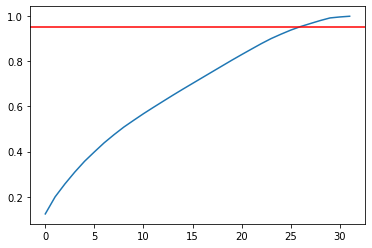

In [150]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(y=0.95, color='r', linestyle='-')
plt.show()

In [151]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [152]:
classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(criterion='entropy',random_state=0),
    DecisionTreeClassifier(criterion='gini',random_state=0),
    RandomForestClassifier(n_estimators=100),
    GaussianNB(),
    BaggingClassifier(random_state=0),
    AdaBoostClassifier(),
    XGBClassifier(random_state=0, n_jobs=-1, learning_rate=0.1,
                  n_estimators=100, max_depth=3)
]

In [153]:
results = []
for item in classifiers:
    print(item,"\n")
    clf = item
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    #print(y_pred)
    #results.append(accuracy_score(y_test,y_pred))
    results.append(y_pred)
    print("accuracy train:",clf.score(X_train,y_train),"\n")
    print("accuracy test:",clf.score(X_test,y_test),"\n")
    print("precision :",precision_score(y_test,y_pred),"\n")
    print('Recall score:',recall_score(y_test,y_pred),'\n')
    print("f1 score:",f1_score(y_test,y_pred),"\n")
    from sklearn.metrics import classification_report
    print(classification_report(y_test,y_pred))
    print("-------------------------------------------------------------------------------------------------------")

LogisticRegression() 

[[39945 14978]
 [20720 33883]]
accuracy train: 0.6751878228204727 

accuracy test: 0.6740682577652795 

precision : 0.6934569493051718 

Recall score: 0.620533670311155 

f1 score: 0.6549717776231346 

              precision    recall  f1-score   support

           0       0.66      0.73      0.69     54923
           1       0.69      0.62      0.65     54603

    accuracy                           0.67    109526
   macro avg       0.68      0.67      0.67    109526
weighted avg       0.68      0.67      0.67    109526

-------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(criterion='entropy', random_state=0) 

[[36716 18207]
 [16987 37616]]
accuracy train: 0.9999960870245734 

accuracy test: 0.6786699048627723 

precision : 0.673844114433119 

Recall score: 0.6888998772961192 

f1 score: 0.6812888269067067 

              precision    recall  f1-score   support

           0       0.68  

# UNDERSAMPLING

Undersampling refers to a group of techniques designed to balance the class distribution for a classification dataset that has a skewed class distribution , in other words it balances the proportion of data for better prediction


In [154]:
not_default = df[df.loan_default==0]
default = df[df.loan_default==1]

In [155]:
not_default_downsampled = resample(not_default,
                                replace = True, # sample without replacement
                                n_samples = len(default), # match minority n
                                random_state = 0) 

In [156]:
downsampled = pd.concat([not_default_downsampled, default])

In [157]:
downsampled

,disbursed_amount,asset_cost,ltv,Date.of.Birth,DisbursalDate,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,...,67,86,120,145,152,153,156,Salaried,Self employed,unknown
54614,11.013913,11.142383,89.08,41.531507,1.213699,0,13,0,0,0,...,0,1,0,0,0,0,0,0.0,1.0,0.0
221560,10.775805,11.058968,76.84,43.980822,1.194521,7,1,0,0,11,...,0,1,0,0,0,0,0,0.0,1.0,0.0
149134,10.937721,11.089805,87.02,45.183562,1.345205,0,13,0,0,0,...,0,1,0,0,0,0,0,0.0,1.0,0.0
225834,11.172166,11.484670,74.06,27.213699,1.169863,0,15,2,0,2,...,0,0,0,0,0,0,0,1.0,0.0,0.0
194055,11.005644,11.133347,89.16,40.613699,1.336986,0,13,0,0,0,...,0,0,0,0,0,0,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233110,10.933339,11.257723,74.86,31.410959,1.169863,6,7,0,0,57,...,0,0,0,0,0,0,0,0.0,1.0,0.0
233120,10.981200,11.456958,63.45,34.021918,1.353425,3,11,0,0,20,...,0,0,1,0,0,0,0,0.0,1.0,0.0
233121,10.959766,11.222025,78.92,36.830137,1.189041,5,9,0,0,14,...,0,0,1,0,0,0,0,1.0,0.0,0.0
233122,10.775805,11.127660,72.03,26.158904,1.210959,7,2,1,0,3,...,0,0,1,0,0,0,0,1.0,0.0,0.0


In [158]:
y=downsampled['loan_default']
X=downsampled.drop(['loan_default'],axis=1)

In [159]:
X.shape

(101222, 39)

In [160]:
y.shape

(101222,)

In [161]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_smote,y_smote,test_size=0.30,random_state=0)

In [162]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [163]:
results = []
for item in classifiers:
    print(item,"\n")
    clf = item
    clf.fit(X_train, y_train)
    y_pred=clf.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    #print(y_pred)
    #results.append(accuracy_score(y_test,y_pred))
    results.append(y_pred)
    print("accuracy train:",clf.score(X_train,y_train),"\n")
    print("accuracy test:",clf.score(X_test,y_test),"\n")
    print("precision :",precision_score(y_test,y_pred),"\n")
    print('Recall score:',recall_score(y_test,y_pred),'\n')
    print("f1 score:",f1_score(y_test,y_pred),"\n")
    from sklearn.metrics import classification_report
    print(classification_report(y_test,y_pred))
    print("-------------------------------------------------------------------------------------------------------")

LogisticRegression() 



C:\Users\Rahul singh\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


[[40479 14444]
 [20590 34013]]
accuracy train: 0.6798051338237596 

accuracy test: 0.6801307452111828 

precision : 0.701921291041542 

Recall score: 0.6229144918777356 

f1 score: 0.6600620997477198 

              precision    recall  f1-score   support

           0       0.66      0.74      0.70     54923
           1       0.70      0.62      0.66     54603

    accuracy                           0.68    109526
   macro avg       0.68      0.68      0.68    109526
weighted avg       0.68      0.68      0.68    109526

-------------------------------------------------------------------------------------------------------
DecisionTreeClassifier(criterion='entropy', random_state=0) 

[[40184 14739]
 [13740 40863]]
accuracy train: 0.9999960870245734 

accuracy test: 0.7399795482351222 

precision : 0.7349196072083738 

Recall score: 0.7483654744244822 

f1 score: 0.7415815979311283 

              precision    recall  f1-score   support

           0       0.75      0.73      0.74    

As we can see after undersampling there has been a notable increase in the precision.